# LAB5 : Voice Signal Filtering with IIR and FIR Filters    
<a target="_blank" href="https://colab.research.google.com/github/zamaS24/DCP_Labs/blob/master/DCP_lab5.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
import librosa 
import numpy as np 
import matplotlib.pyplot as plt

# 1. recording and plotting a voice signal

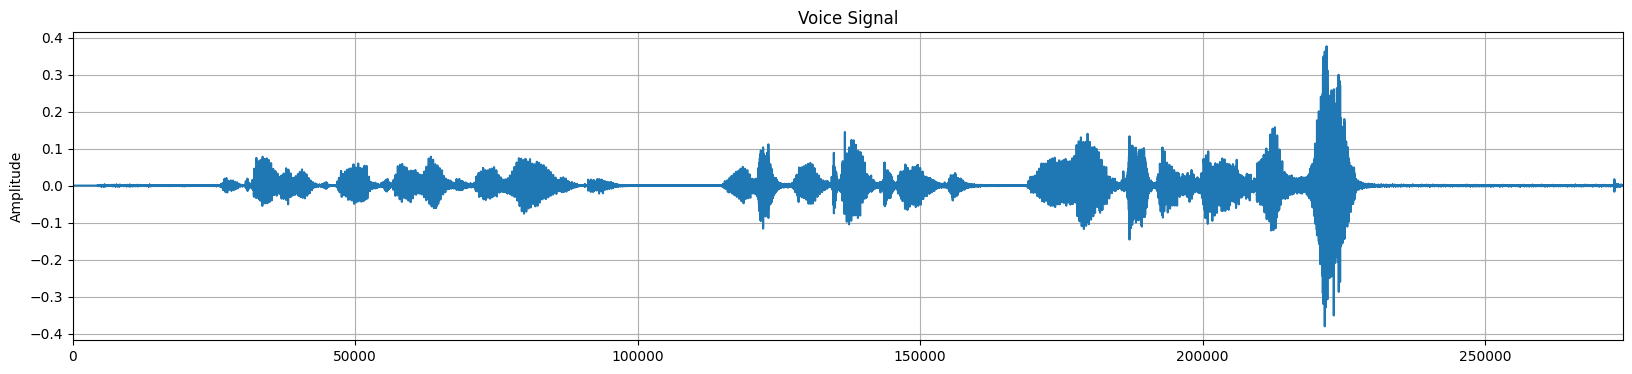

In [44]:

# if you are running this in colab you should put your own record file
record_path = os.path.join('record.wav')
_signal, _fs = librosa.load(record_path, sr=None) 

plt.figure(figsize=(20, 4), dpi=100)
plt.plot(_signal)  # I wil ignore the time axis, I only care about amplite
plt.title('Voice Signal')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, len(_signal))  
plt.show()

In [3]:
print('duration = ', _signal.shape[0]*(1/_fs), 's')
print('sampling frequency : ', _fs)

duration =  5.717333333333333 s
sampling frequency :  48000


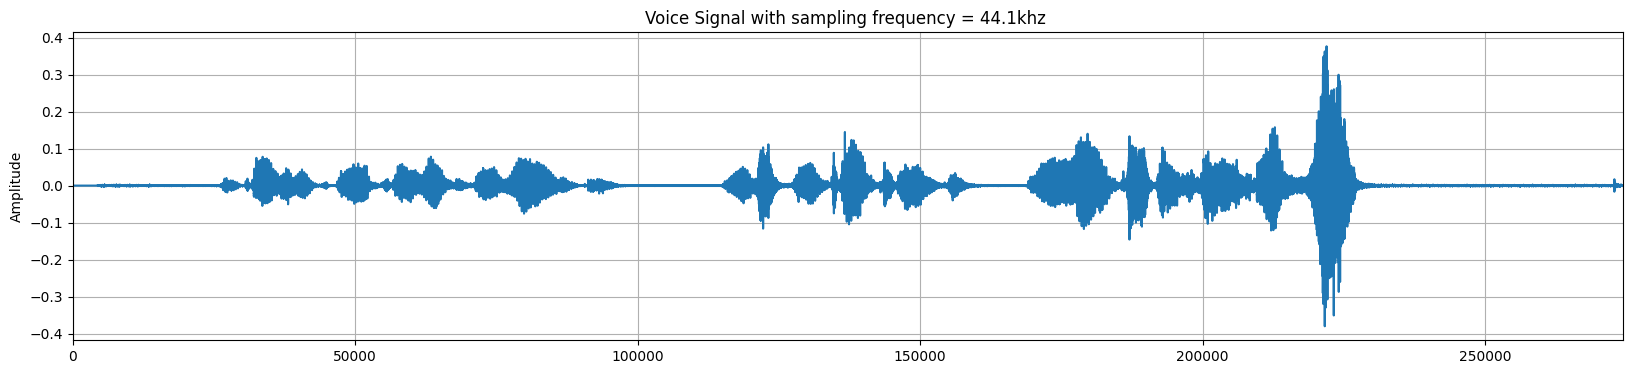

In [4]:
# resampling the signal to 44.1khz as demanded 
fs = 44100  # 44.1 kHz
signal = librosa.resample(_signal, orig_sr=fs, target_sr=fs)

plt.figure(figsize=(20, 4), dpi=100)
plt.plot(signal)  # I wil ignore the time axis, I only care about amplite
plt.title('Voice Signal with sampling frequency = 44.1khz ')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, len(signal))  
plt.show()

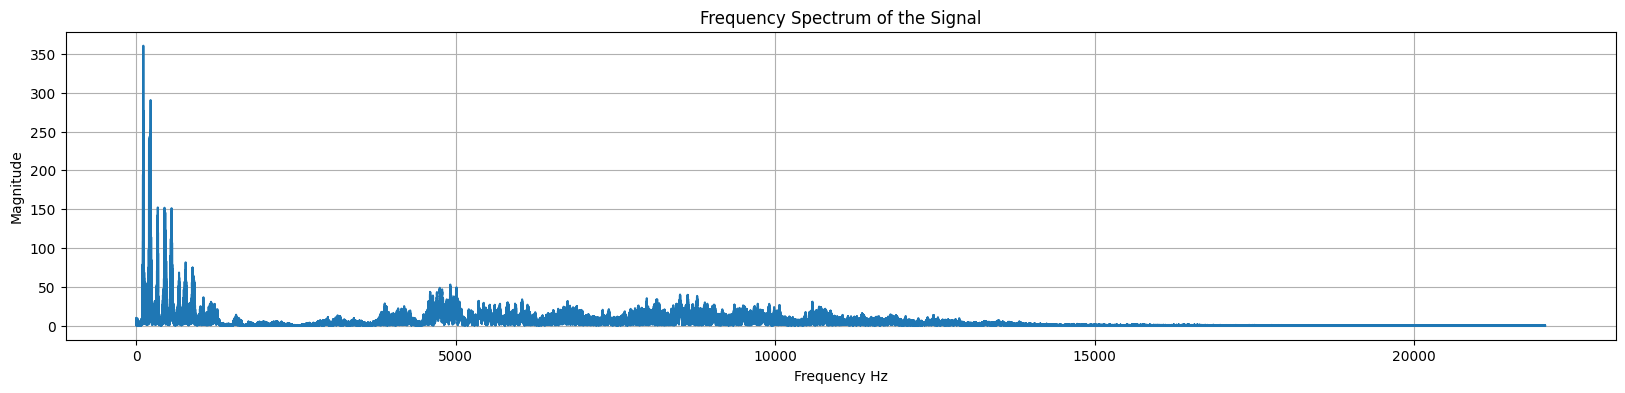

In [5]:
# Compute the FFT of the signal
fft_signal = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), 1/fs)

# Plot the frequency spectrum
plt.figure(figsize=(20, 4), dpi=100)
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_signal)[:len(fft_signal)//2])
plt.title('Frequency Spectrum of the Signal')
plt.xlabel('Frequency Hz')
plt.ylabel('Magnitude')
plt.grid() 
plt.show()

# 2. IIR Filter Design and Application 

### 2.1 Design IIR Filters with Different Orders and Types

In [6]:
from scipy.signal import butter, freqz

# scipy.signal.butter(), given : order, cutoff and type returns the arrays coeff that we will use to make the filter 
# scipy.signal.freqz(), given the coeff arrays returned by butter returns the corresponding frequency response of the filter (w,h)

# also if we want to make the unit to DB we need to : 20*log(10)(abs(values))

# Define filter specifications
cutoff_low = 3000  
cutoff_high = 500  
cutoff_band = [500, 3000]  

# order of the filter, necessary for the filter design algorithm
orders = [2, 4, 6]

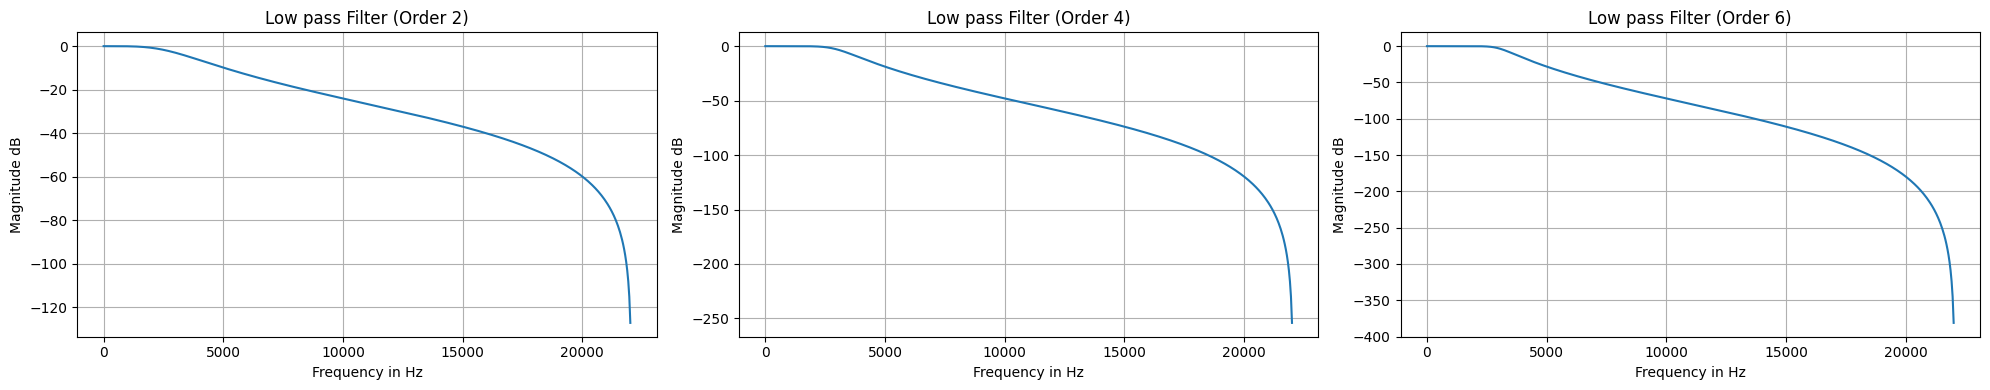

In [7]:

low_pass_coeffs = []
high_pass_coeffs = []
band_pass_coeffs = []

# Low pass filters 
plt.figure(figsize=(20, 4))
for i, order in enumerate(orders):       
    b, a = butter(order, cutoff_low, btype='low', fs=fs)
    low_pass_coeffs.append((b,a))
    w, h = freqz(b, a, fs=fs)
    plt.subplot(1, 3, i + 1)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}') # here we will get magnitude in DB
    plt.title(f'Low pass Filter (Order {order})')
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Magnitude dB')
    plt.grid()
plt.tight_layout()
plt.show()


C:\Users\monms\AppData\Local\Temp\ipykernel_40992\4156463414.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}')


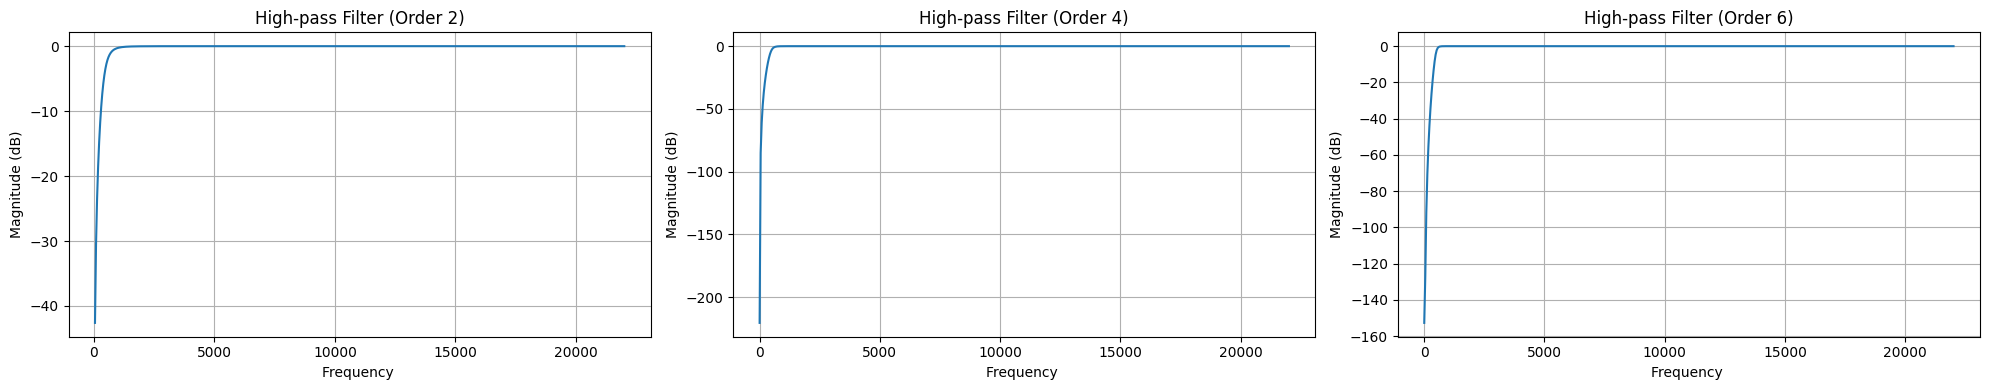

In [8]:
# High pass filter
plt.figure(figsize=(20, 4))
for i, order in enumerate(orders):
    b, a = butter(order, cutoff_high, btype='high', fs=fs)
    high_pass_coeffs.append((b,a))
    w, h = freqz(b, a, fs=fs)
    plt.subplot(1, 3, i + 1)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}')
    plt.title(f'High-pass Filter (Order {order})')
    plt.xlabel('Frequency ')
    plt.ylabel('Magnitude (dB)')
    plt.grid()
plt.tight_layout()
plt.show()

C:\Users\monms\AppData\Local\Temp\ipykernel_40992\2174015777.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}')


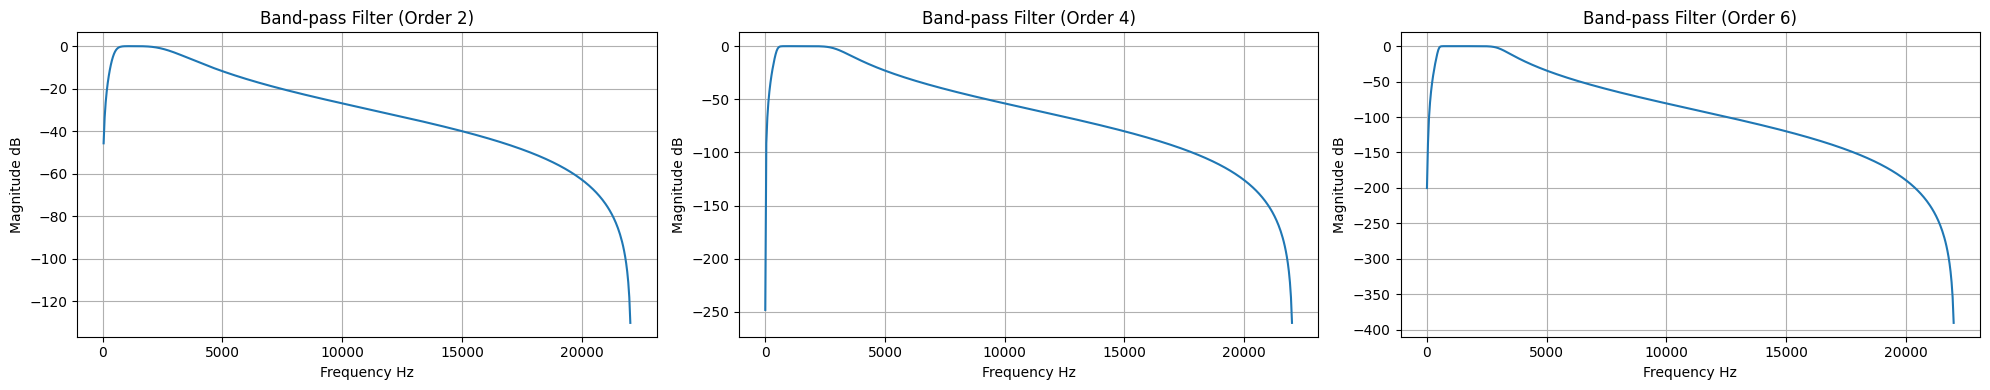

In [9]:
# Band pass filter
plt.figure(figsize=(20, 4))
for i, order in enumerate(orders):
    b, a = butter(order, cutoff_band, btype='band', fs=fs)
    band_pass_coeffs.append((b,a))
    w, h = freqz(b, a, fs=fs)
    plt.subplot(1, 3, i + 1)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}')
    plt.title(f'Band-pass Filter (Order {order})')
    plt.xlabel('Frequency Hz')
    plt.ylabel('Magnitude dB') # because the magnitude is turned to 20*lon10
    plt.grid()
plt.tight_layout()
plt.show()

### 2.2 filtering the voice signal 

In [10]:
from scipy.signal import lfilter

In [11]:
print(len(low_pass_coeffs))

3


************************* displaying all type of filter results for order = 2 *******************************************


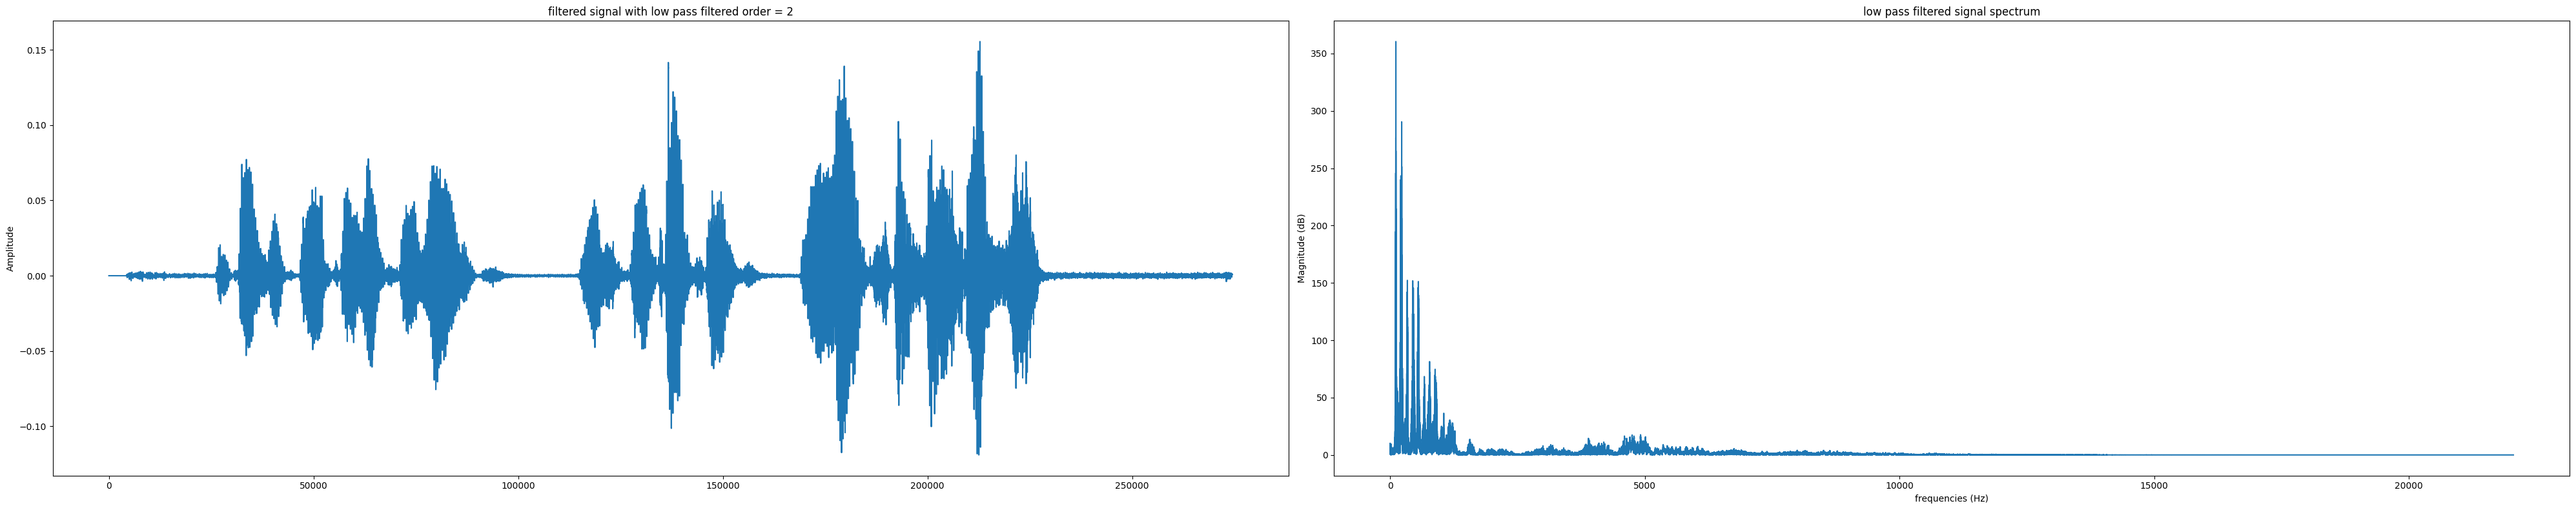

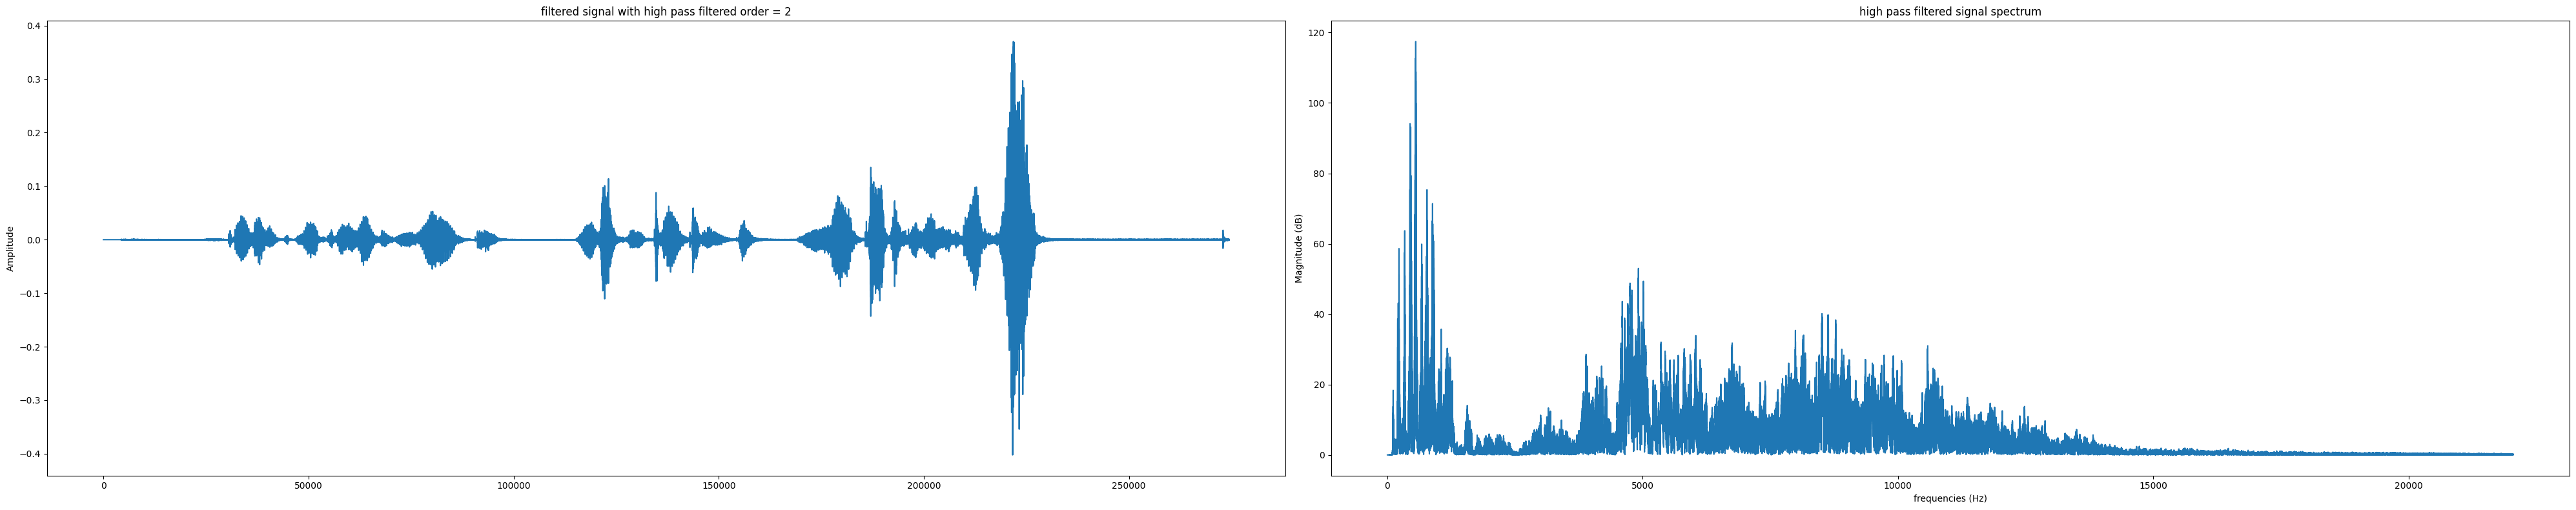

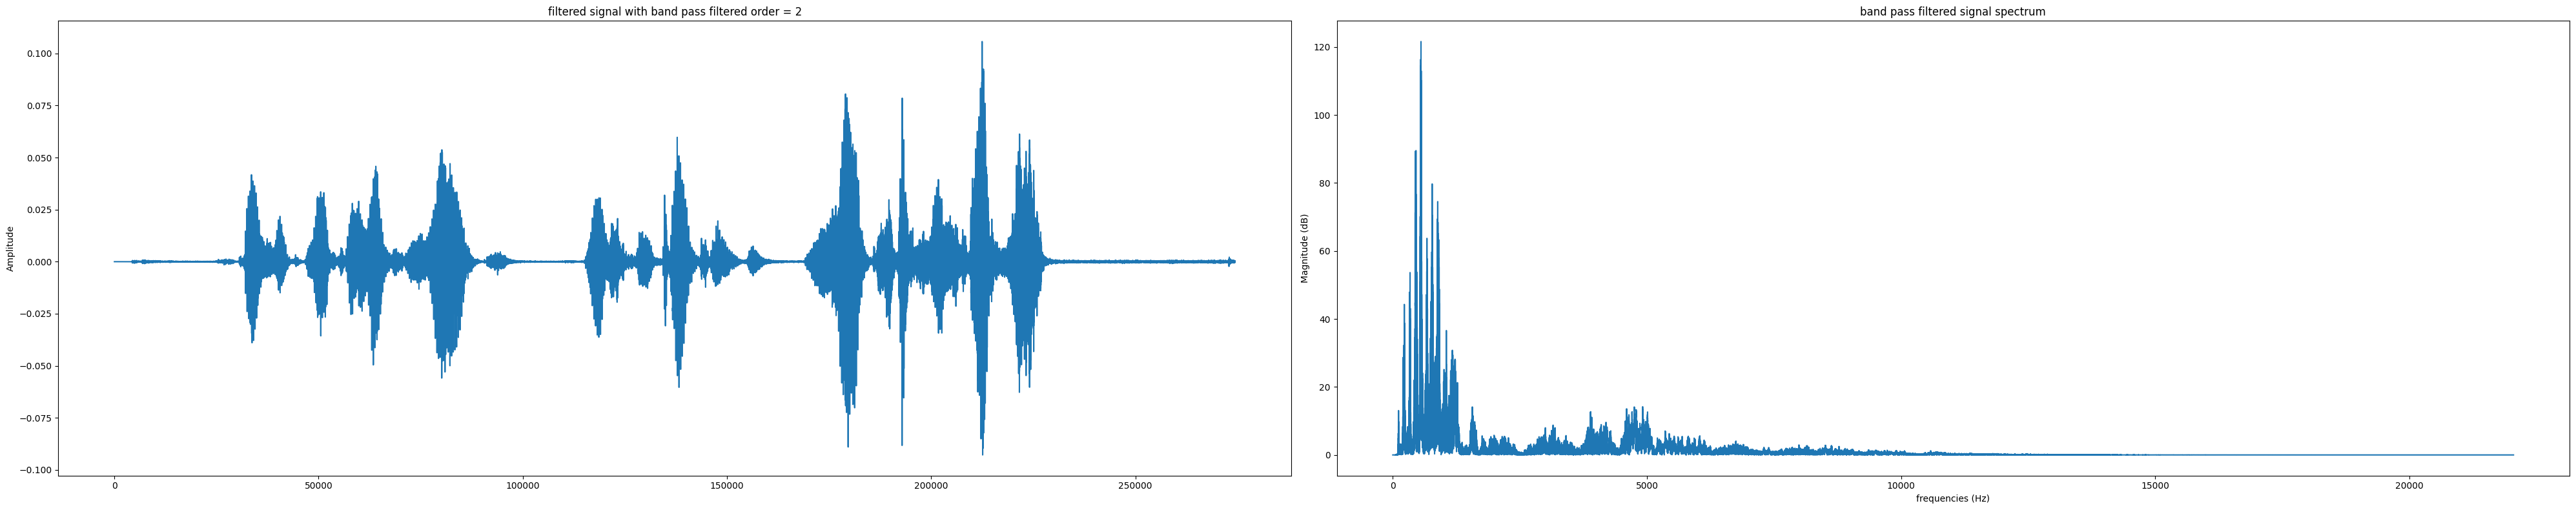



************************* displaying all type of filter results for order = 4 *******************************************


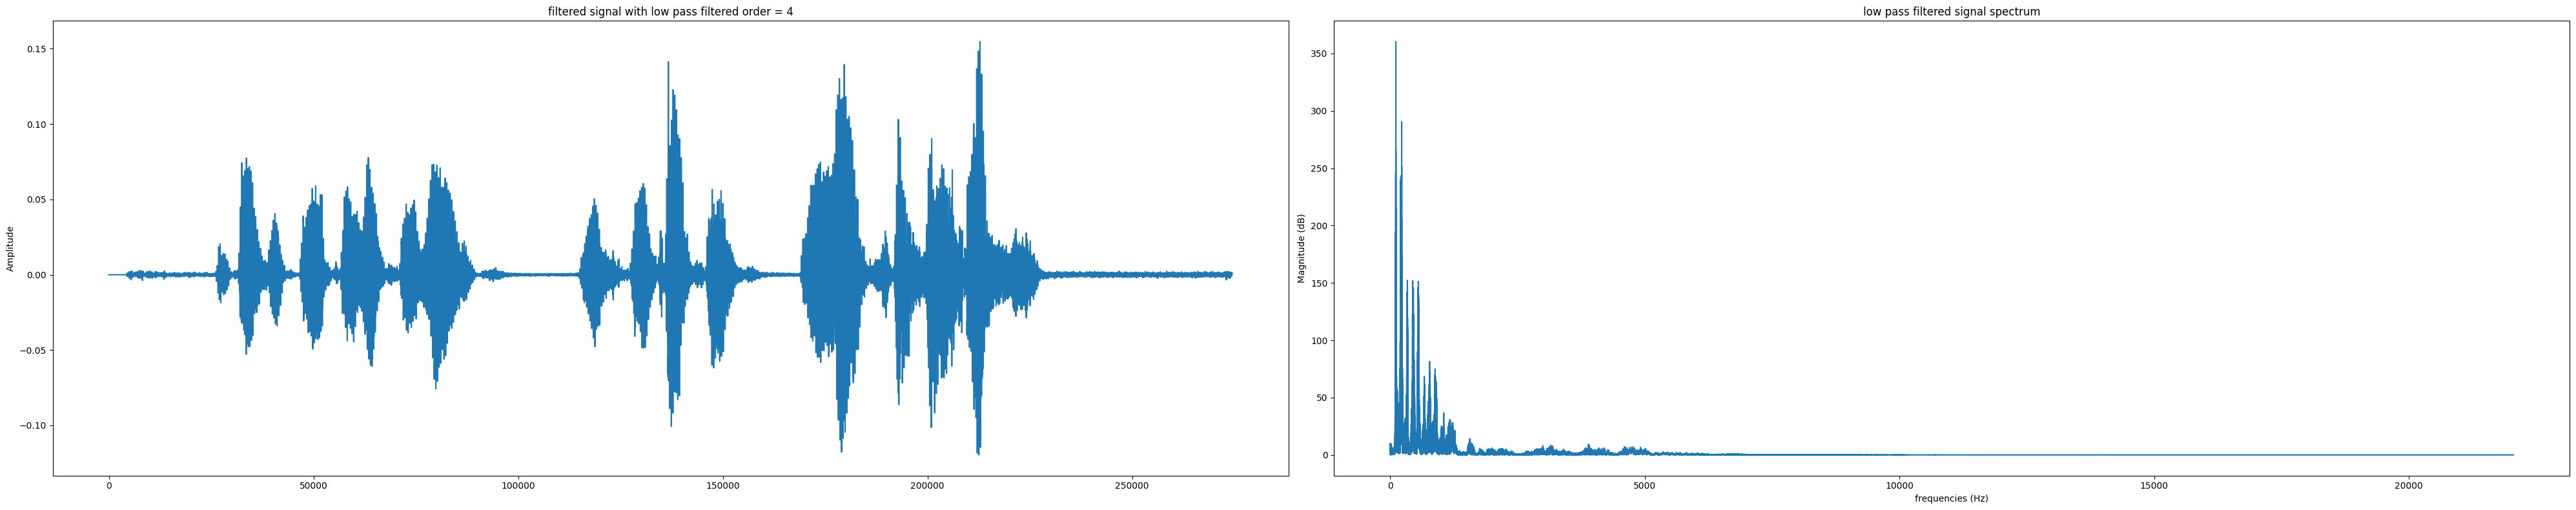

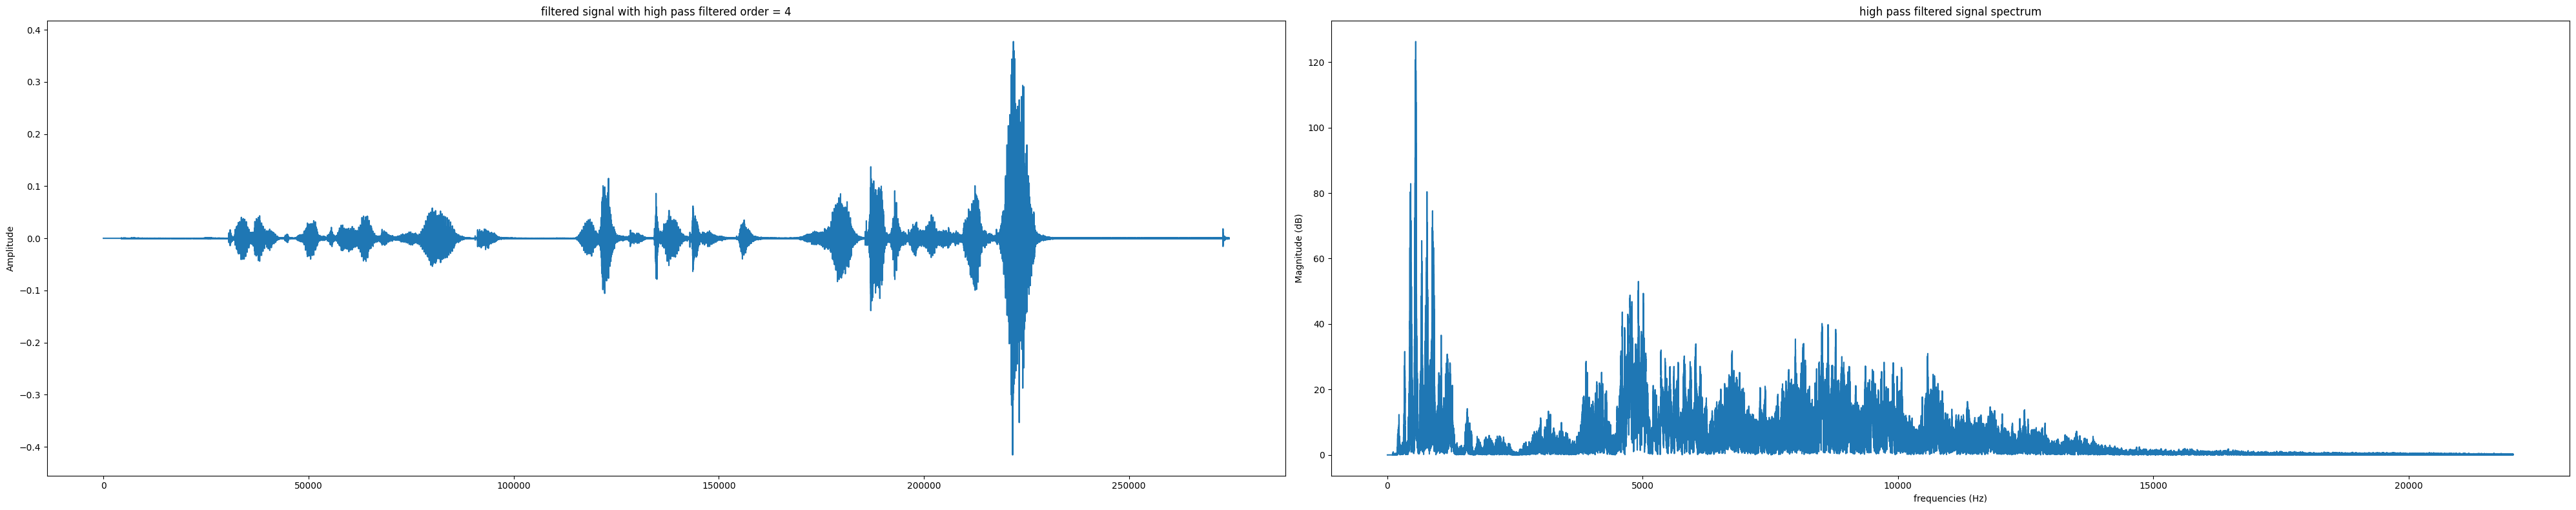

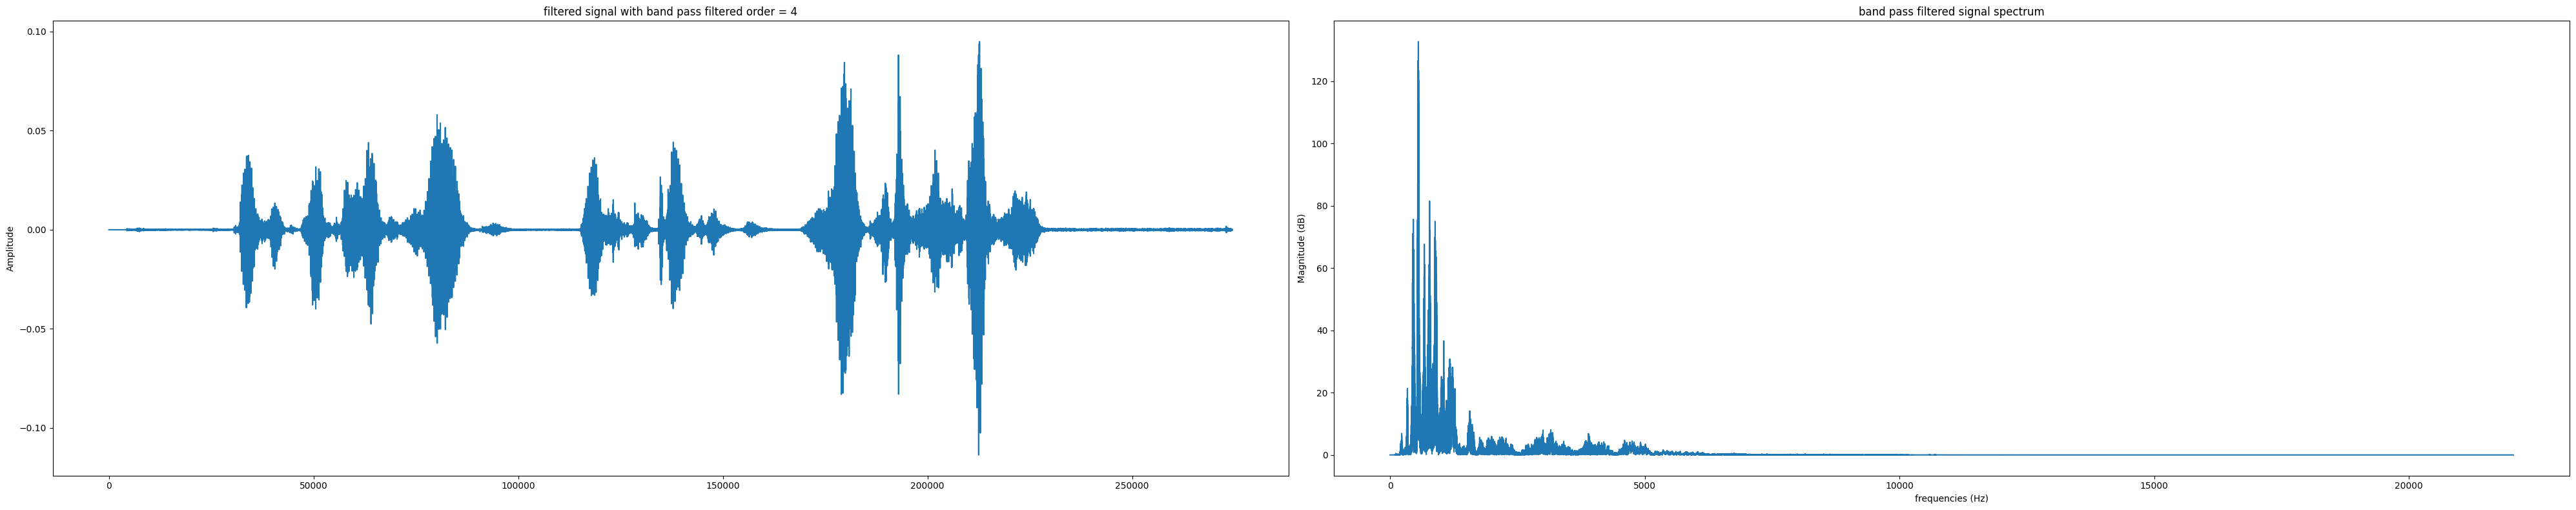



************************* displaying all type of filter results for order = 6 *******************************************


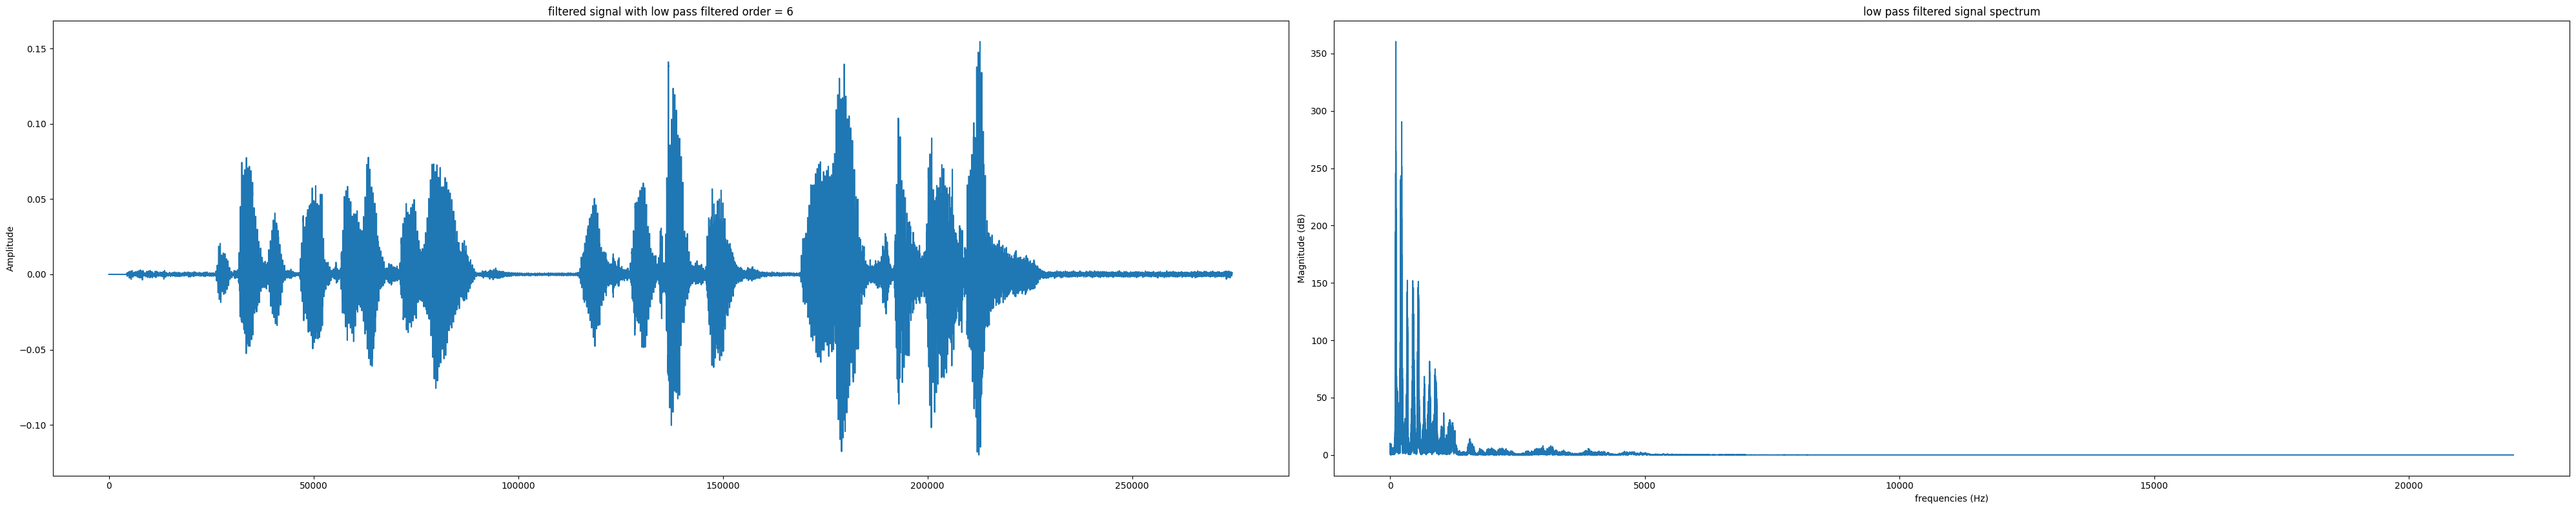

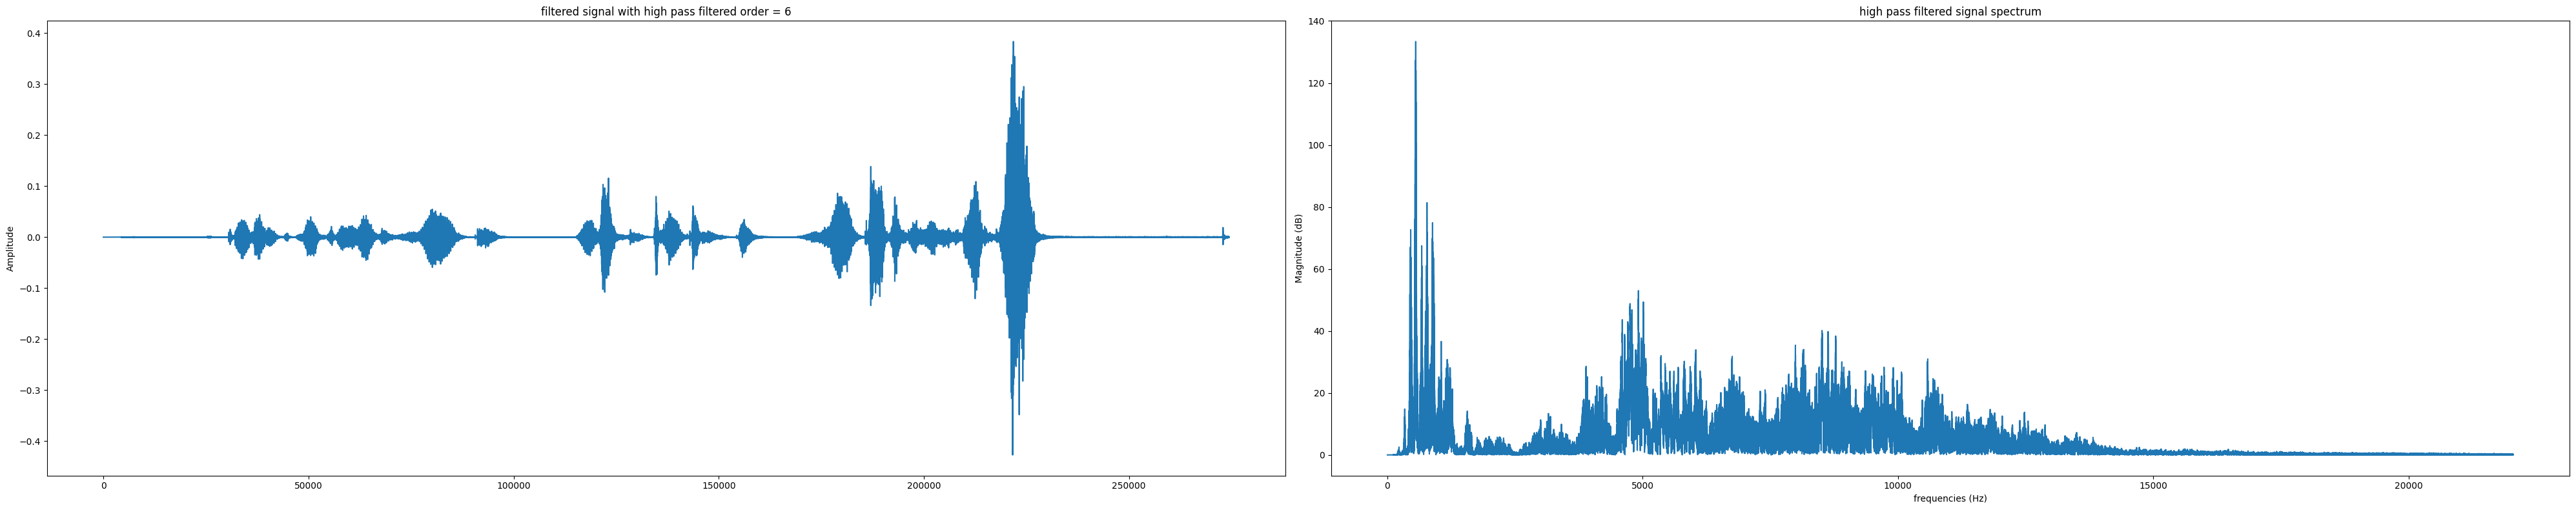

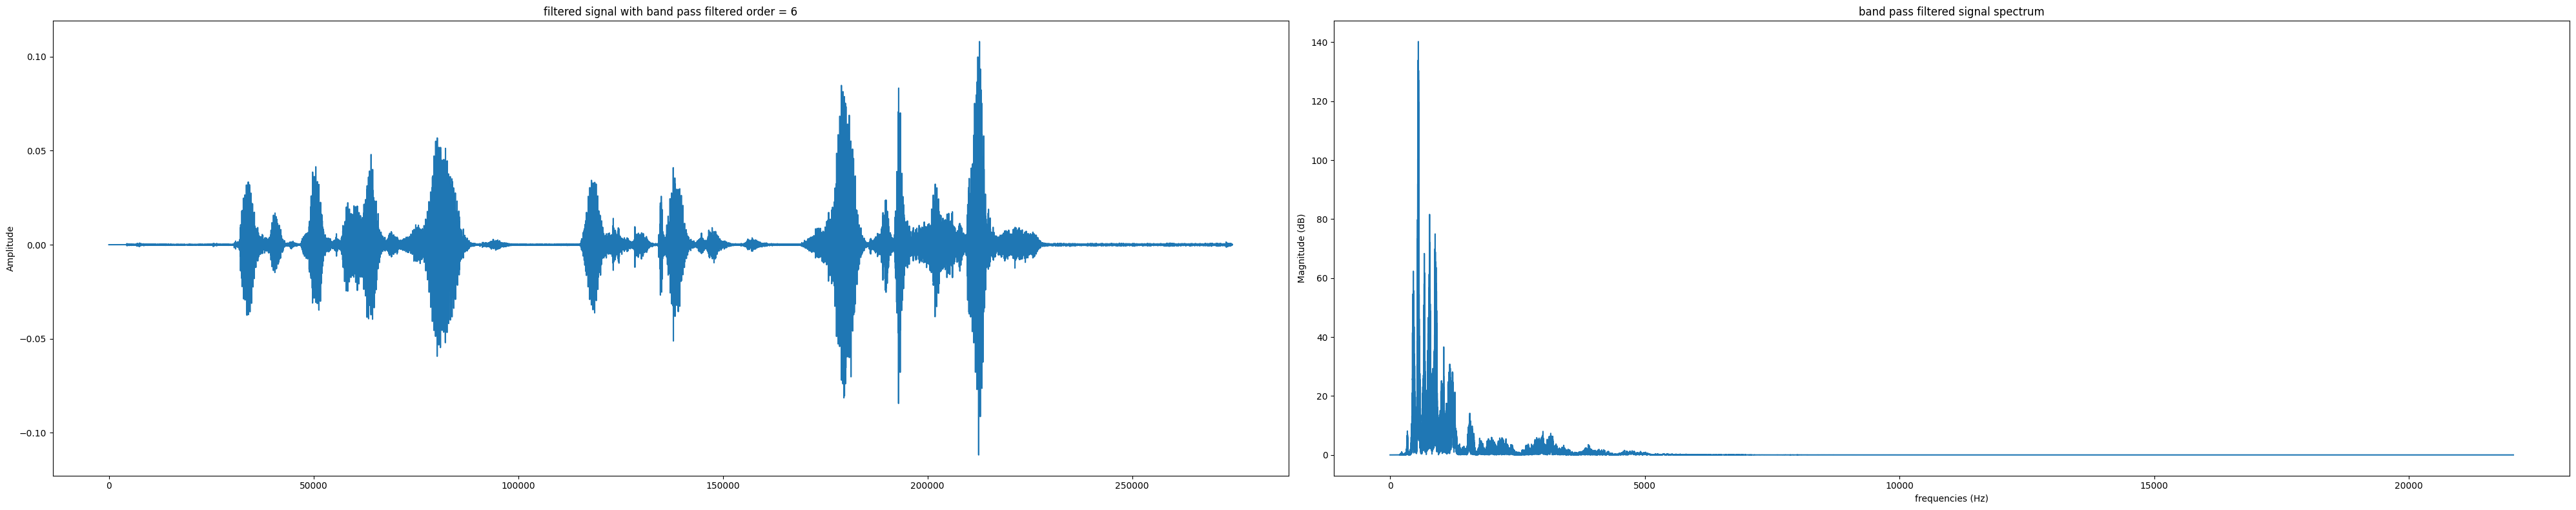

In [47]:
# low pass 

for j in range(len(orders)): 

    print(f'************************* displaying all type of filter results for order = {orders[j]} *******************************************')
    low_pass = low_pass_coeffs[j]
    high_pass_coeff = high_pass_coeffs[j]
    band_pass_coeff = band_pass_coeffs[j]

    filters_coeffs = [low_pass, high_pass_coeff, band_pass_coeff]

    for i in range(3): 

        
        # Applying the IIR filter to the signal
        filtered_signal = lfilter(*filters_coeffs[i], signal)
        if i == 0: 
            _type ='low pass'

        if i ==1: 
            _type = 'high pass'

        if i ==2: 
            _type = 'band pass'


        # displaying the fitered signal spectrum and compare it to the original signal spectrum
        fft_filtered_signal = np.fft.fft(filtered_signal)
        fft_filtered_freq = np.fft.fftfreq(len(filtered_signal), 1/fs)
        fig, axs = plt.subplots(1, 2, figsize=(40, 8))

        axs[0].plot(filtered_signal)
        axs[0].set_title(f'filtered signal with {_type} filtered order = {orders[j]}')
        axs[0].set_ylabel('Amplitude')

        

        axs[1].plot(fft_filtered_freq[:len(fft_filtered_freq)//2], np.abs(fft_filtered_signal)[:len(fft_filtered_signal)//2])
        axs[1].set_title(f'{_type} filtered signal spectrum')
        axs[1].set_xlabel('frequencies (Hz)')
        axs[1].set_ylabel('Magnitude (dB)')


        plt.tight_layout()
        plt.show()

        print('\n')

# 3. IIR vs FIR filters

In [31]:
fir_low_pass_coeffs = []
fir_high_pass_coeffs = []
fir_band_pass_coeffs = []

let's make first the FIR filters and displaye their frequency response

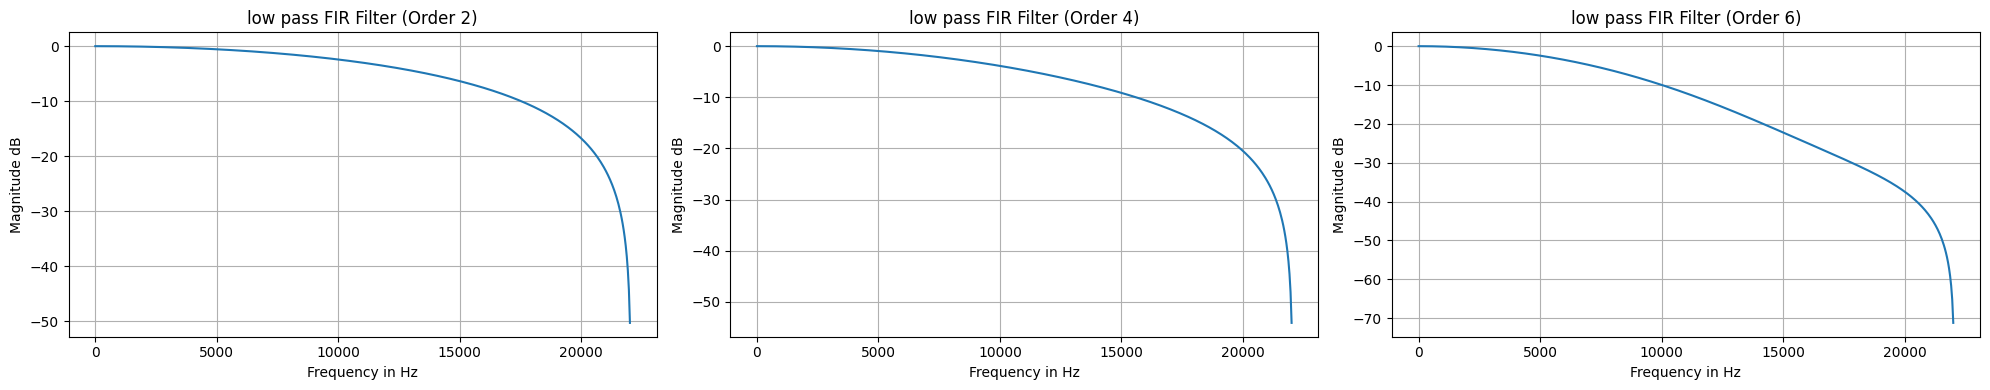

In [32]:
from scipy.signal import firwin, freqz


# low pass filters using FIR
plt.figure(figsize=(20, 4))
for i, order in enumerate(orders):
    b = firwin(order , cutoff_low, fs=fs)
    fir_high_pass_coeffs.append(b)
    w, h = freqz(b, 1, fs=fs)
    plt.subplot(1, 3, i + 1)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}') # here we will get magnitude in DB
    plt.title(f'low pass FIR Filter (Order {order})')
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Magnitude dB')
    plt.grid()
plt.tight_layout()
plt.show()

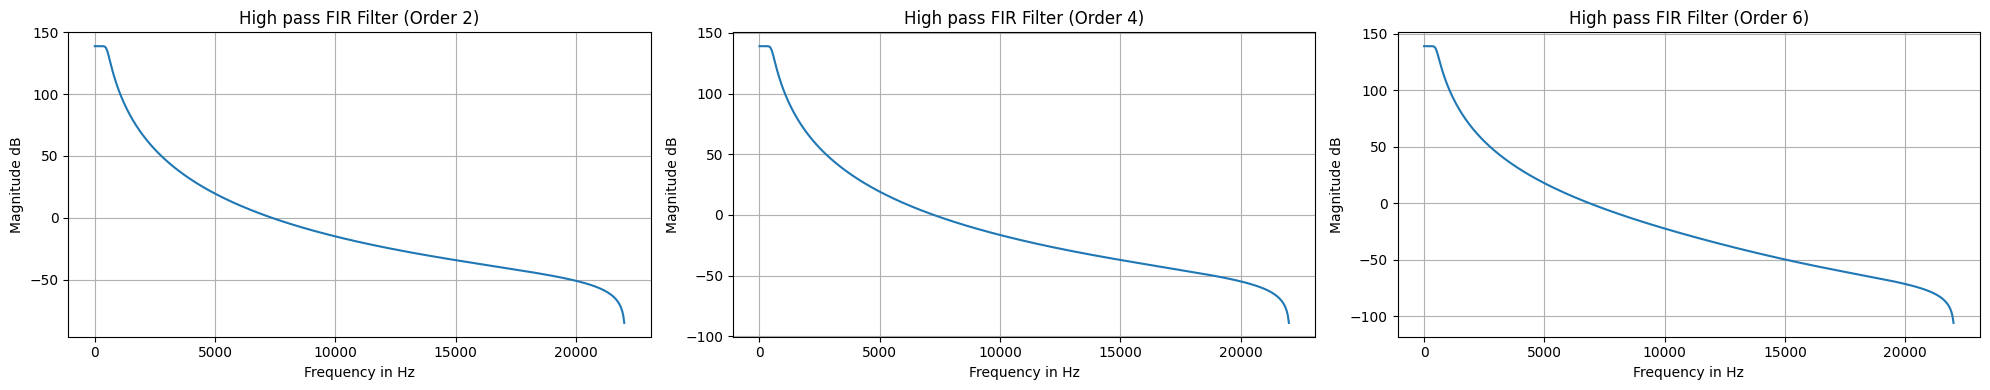

In [33]:
# high pass filters 
plt.figure(figsize=(20, 4))
for i, order in enumerate(orders):       
    b = firwin(order, cutoff_band, pass_zero=False, fs=fs)
    fir_low_pass_coeffs.append((b))
    w, h = freqz(b, a, fs=fs)
    plt.subplot(1, 3, i + 1)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}') # here we will get magnitude in DB
    plt.title(f'High pass FIR Filter (Order {order})')
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Magnitude dB')
    plt.grid()
plt.tight_layout()
plt.show()

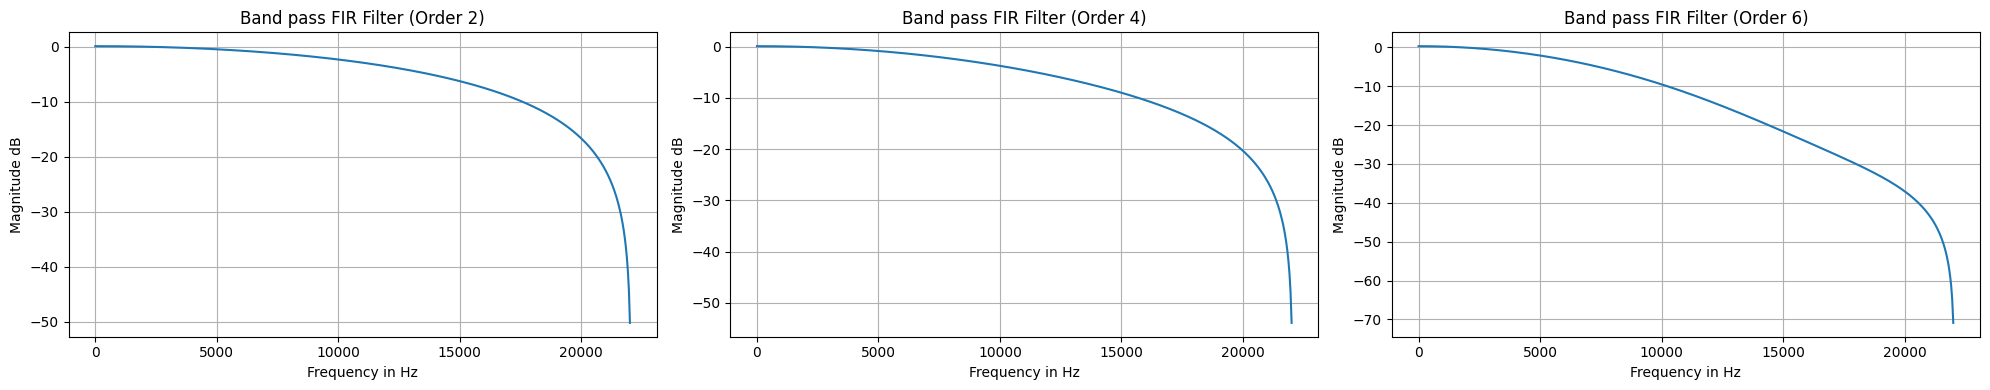

In [34]:
# band pass filters using FIR
plt.figure(figsize=(20, 4))
for i, order in enumerate(orders):
    b = firwin(order, cutoff_band, pass_zero=False, fs=fs)
    fir_band_pass_coeffs.append(b)
    w, h = freqz(b, 1, fs=fs)
    plt.subplot(1, 3, i + 1)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order {order}') # here we will get magnitude in DB
    plt.title(f'Band pass FIR Filter (Order {order})')
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Magnitude dB')
    plt.grid()
plt.tight_layout()
plt.show()

Now filtering the signal with FIR filters

************************* displaying all type of filter results for order = 2 *******************************************


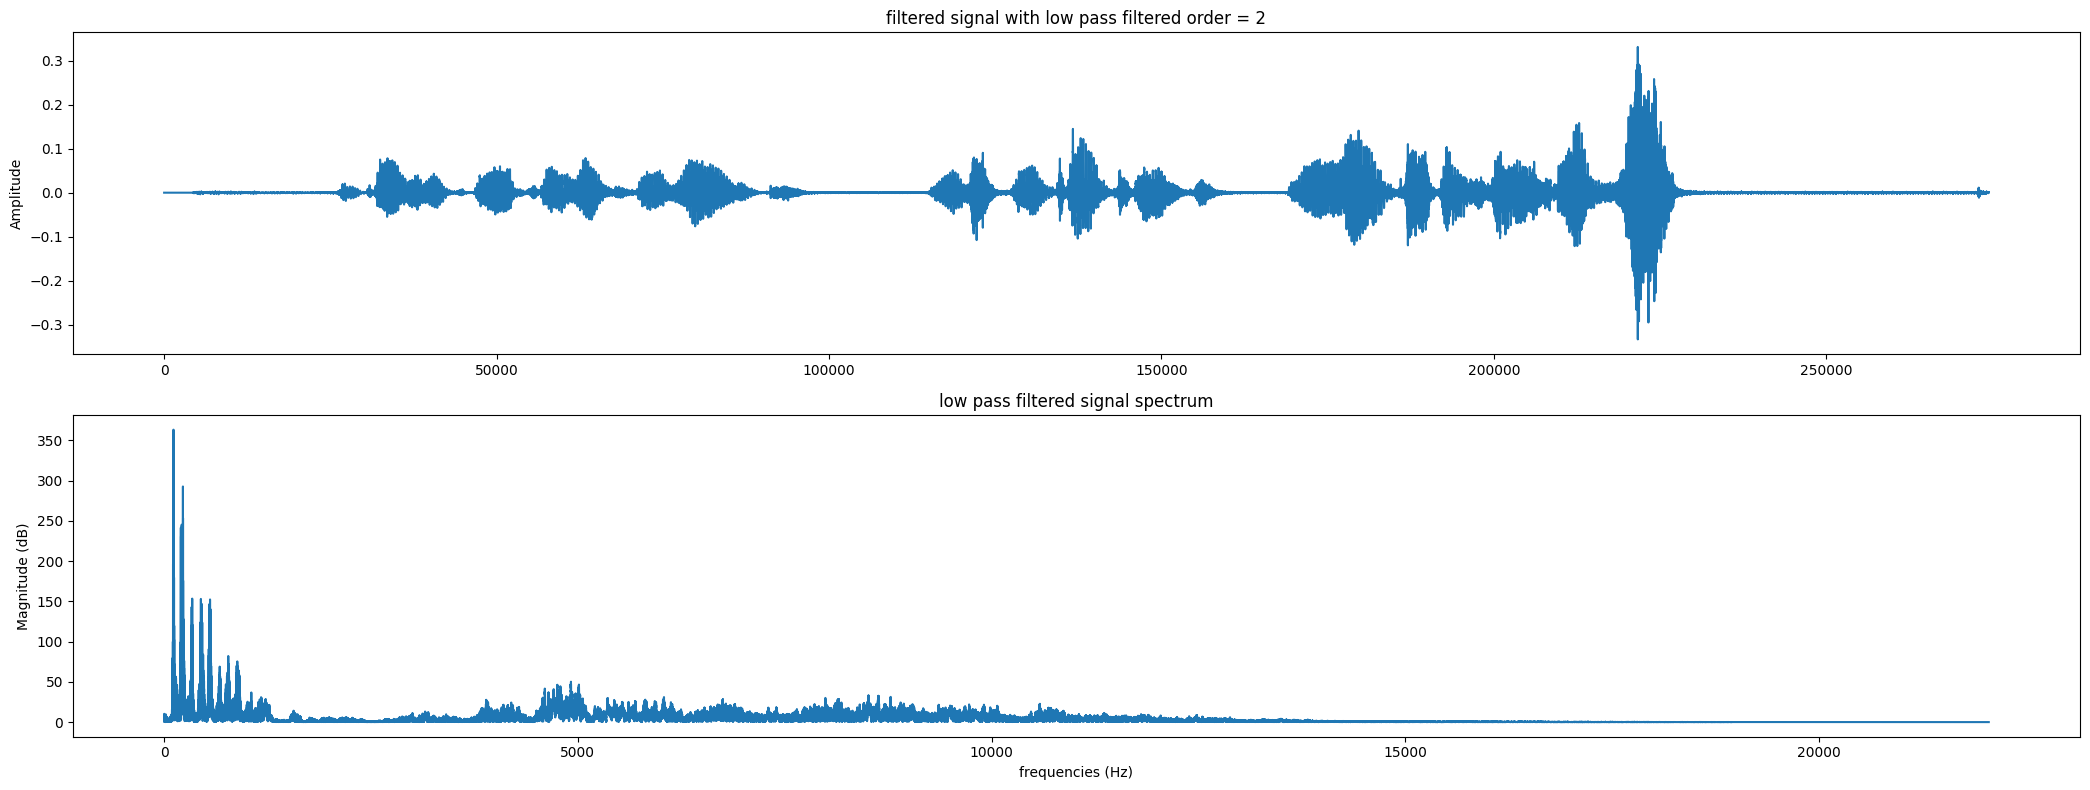

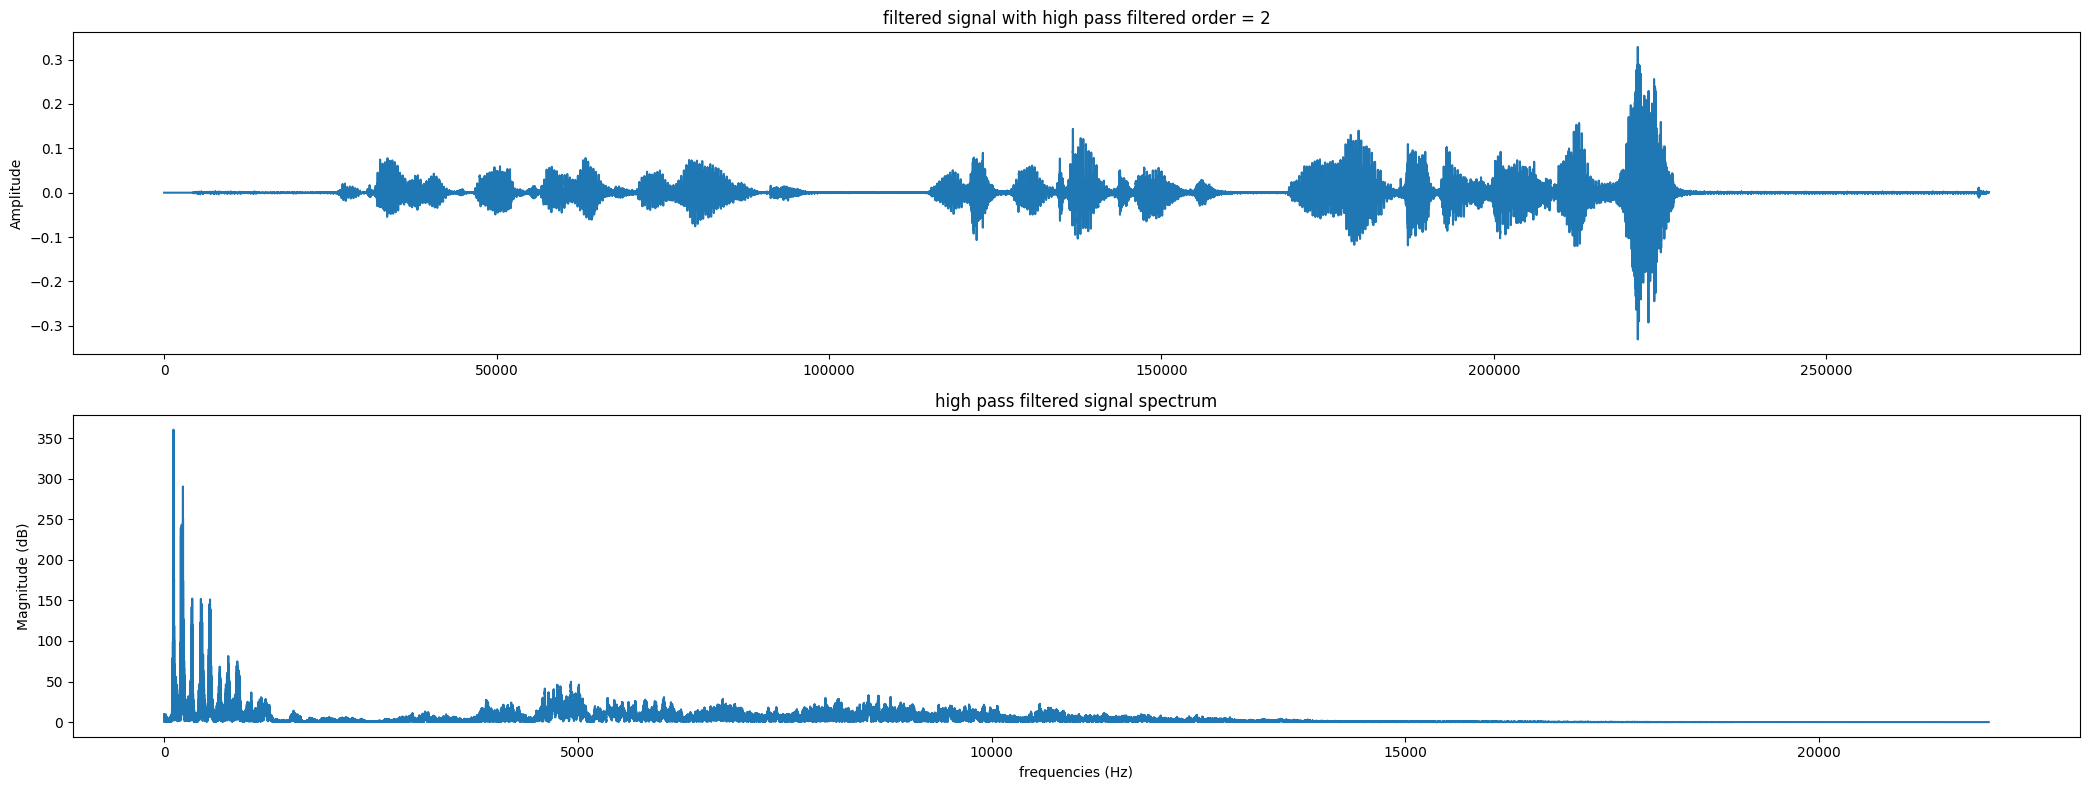

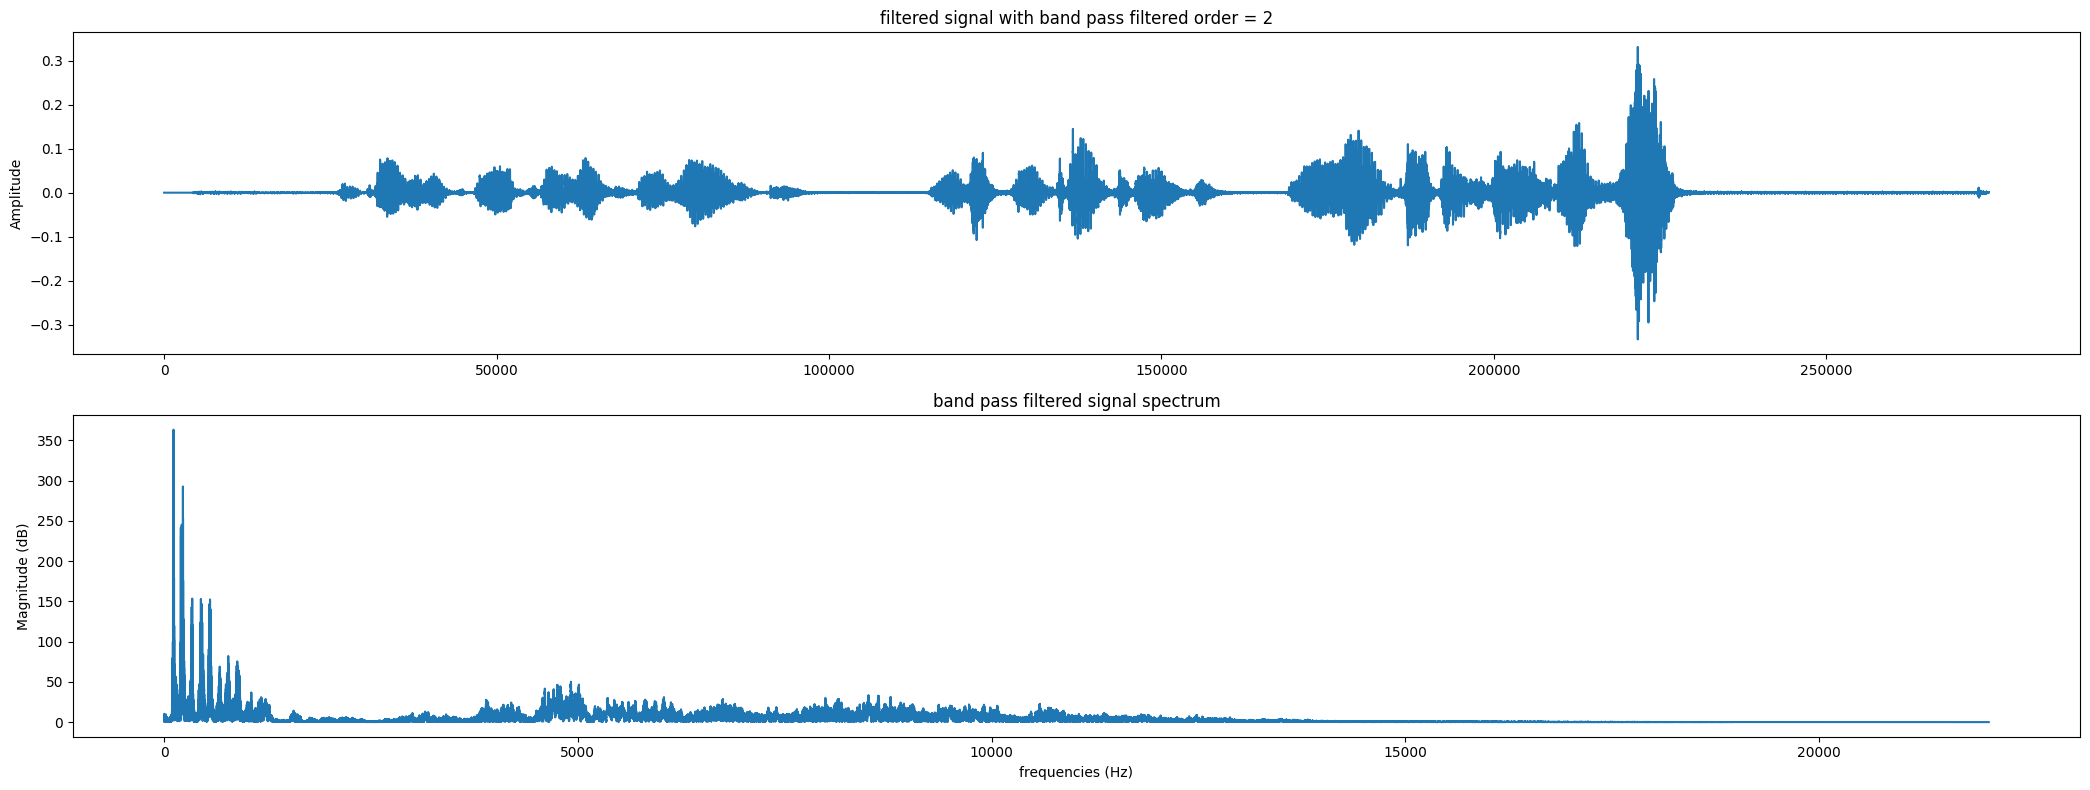



************************* displaying all type of filter results for order = 4 *******************************************


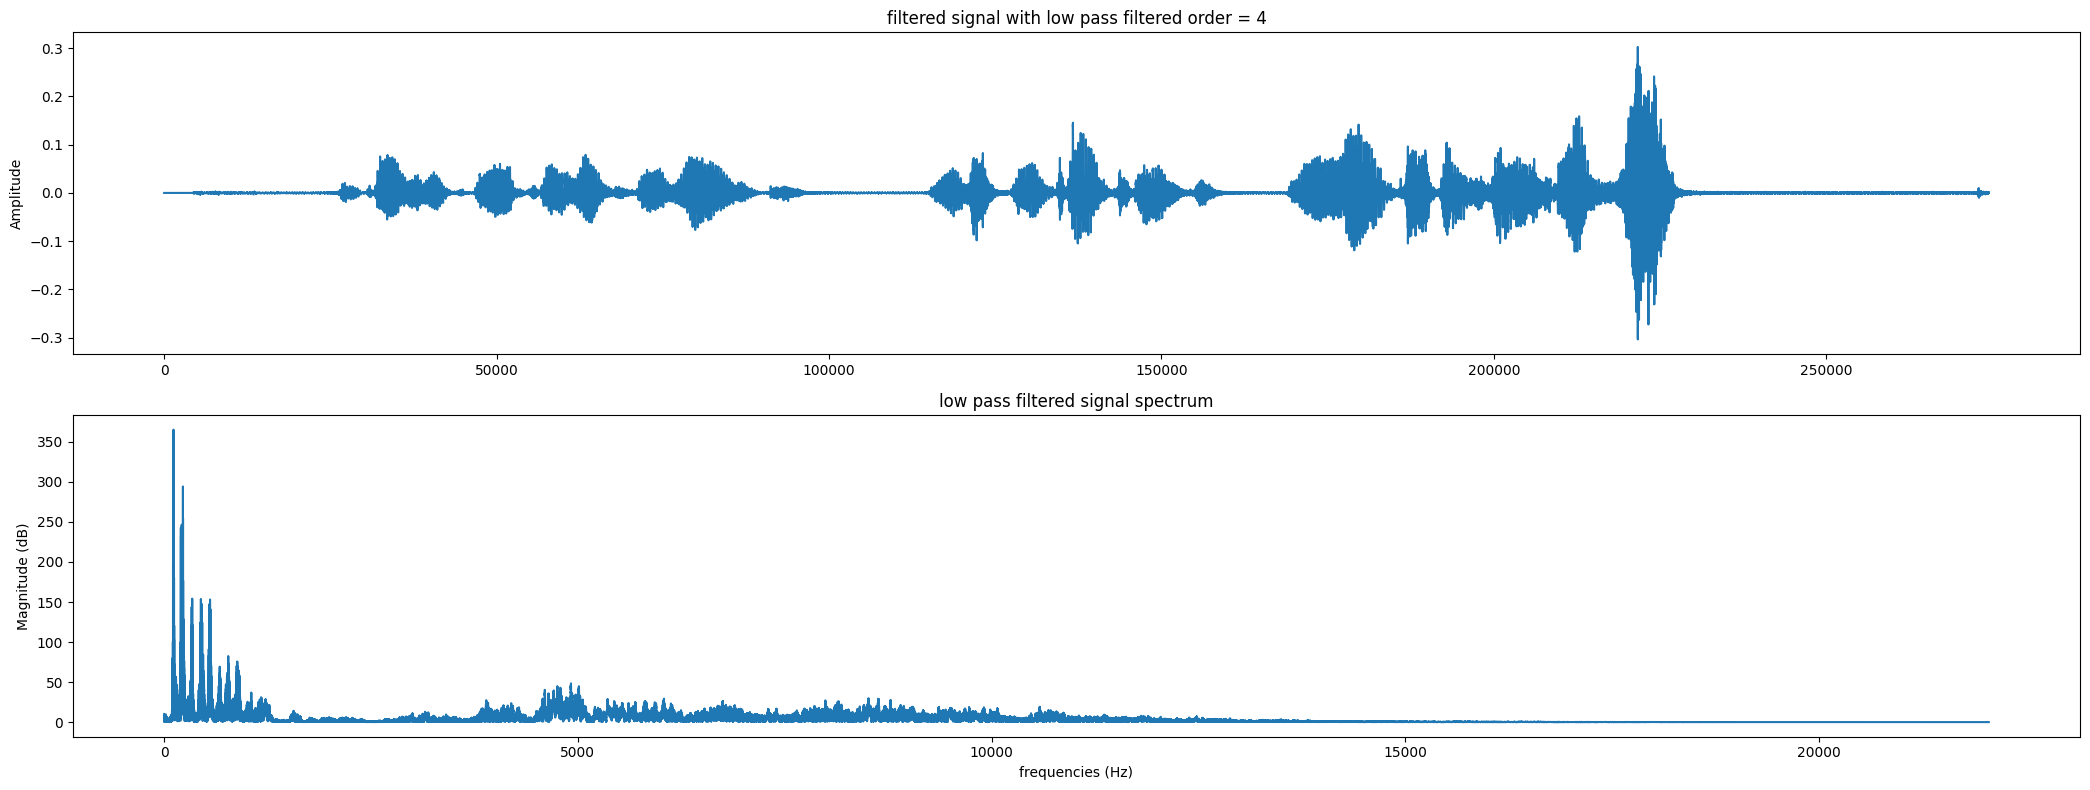

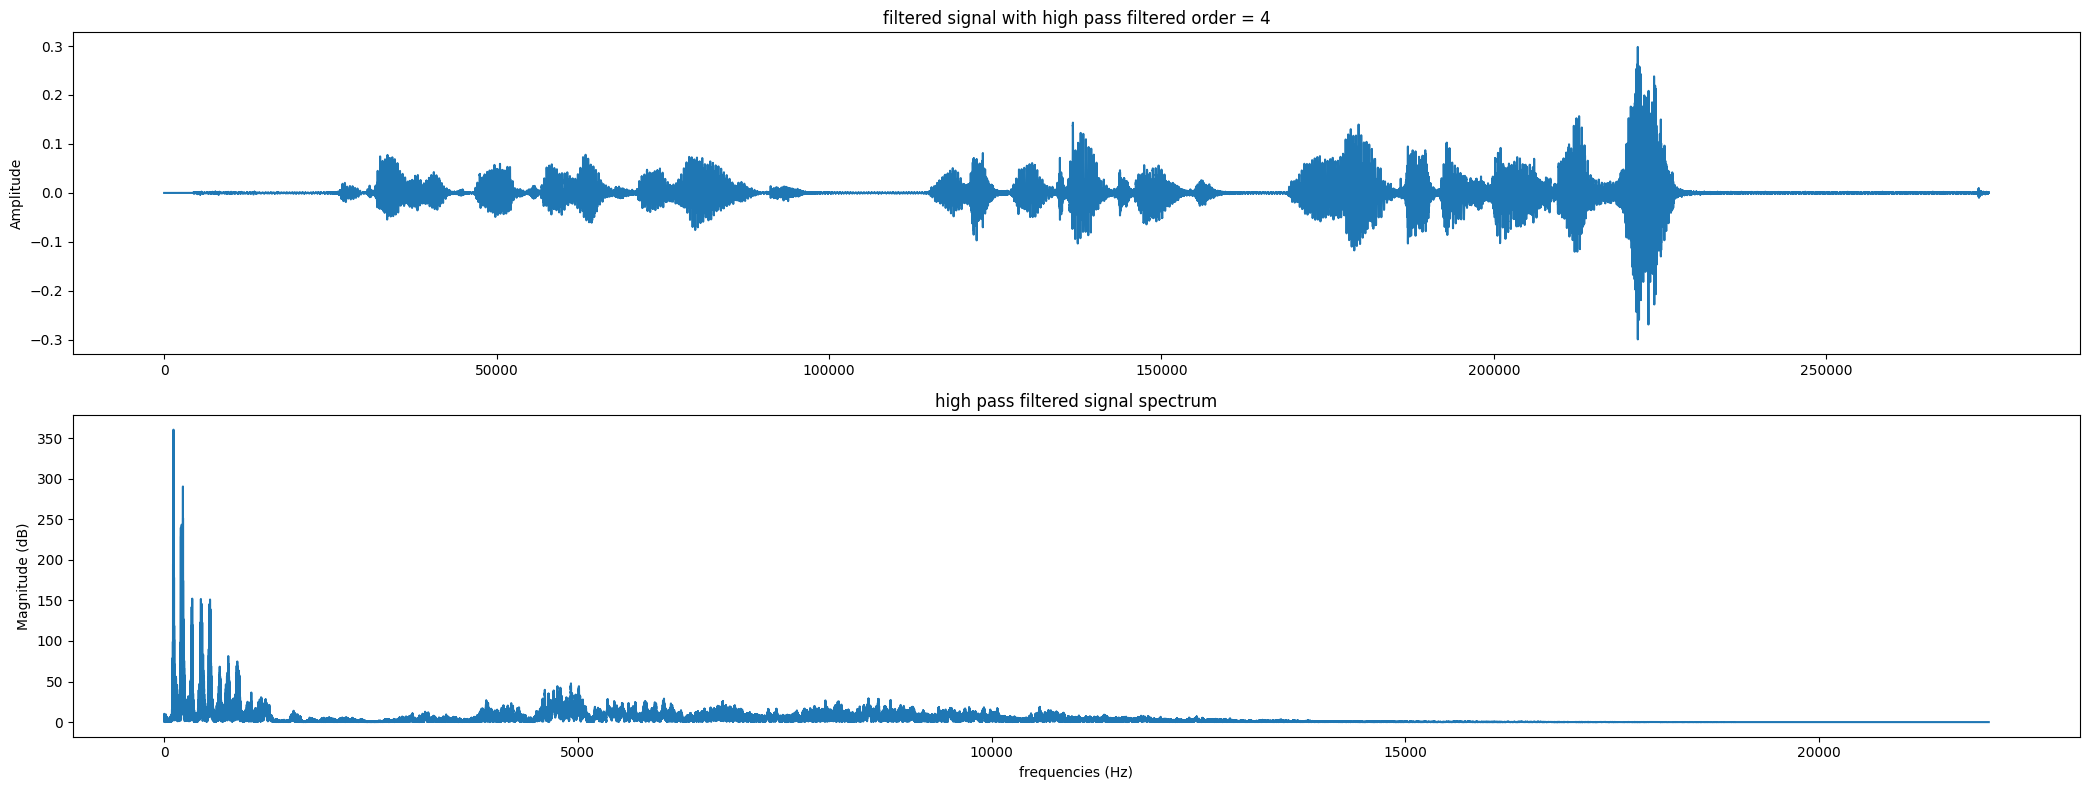

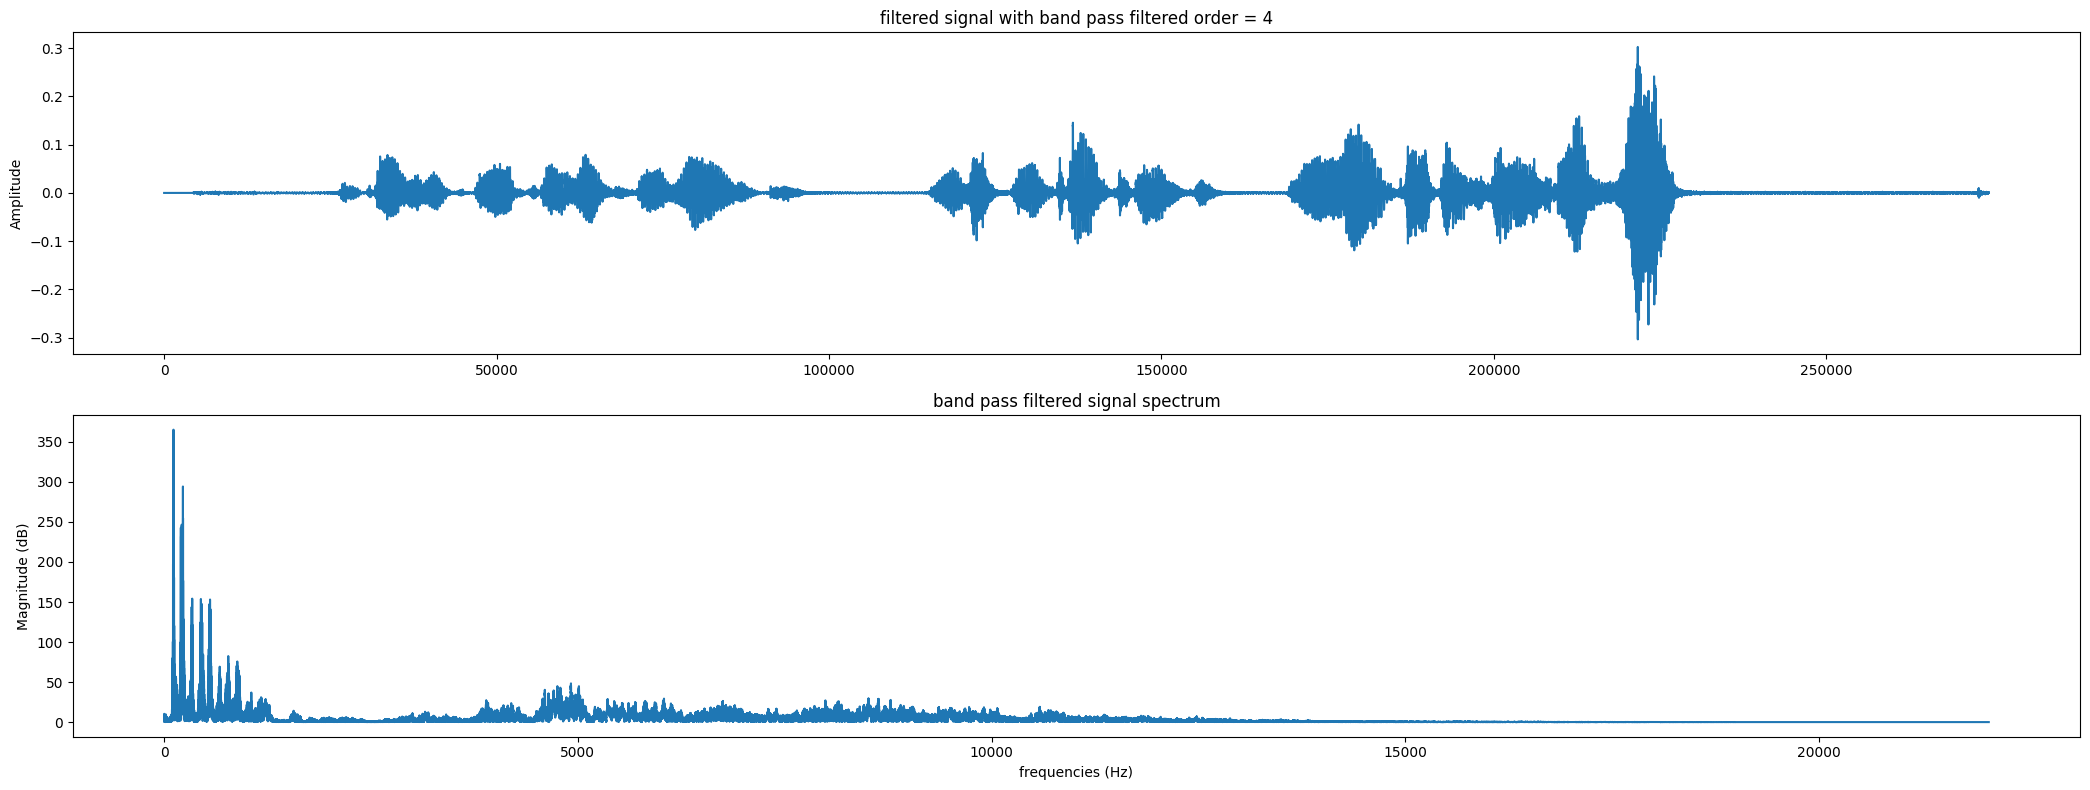



************************* displaying all type of filter results for order = 6 *******************************************


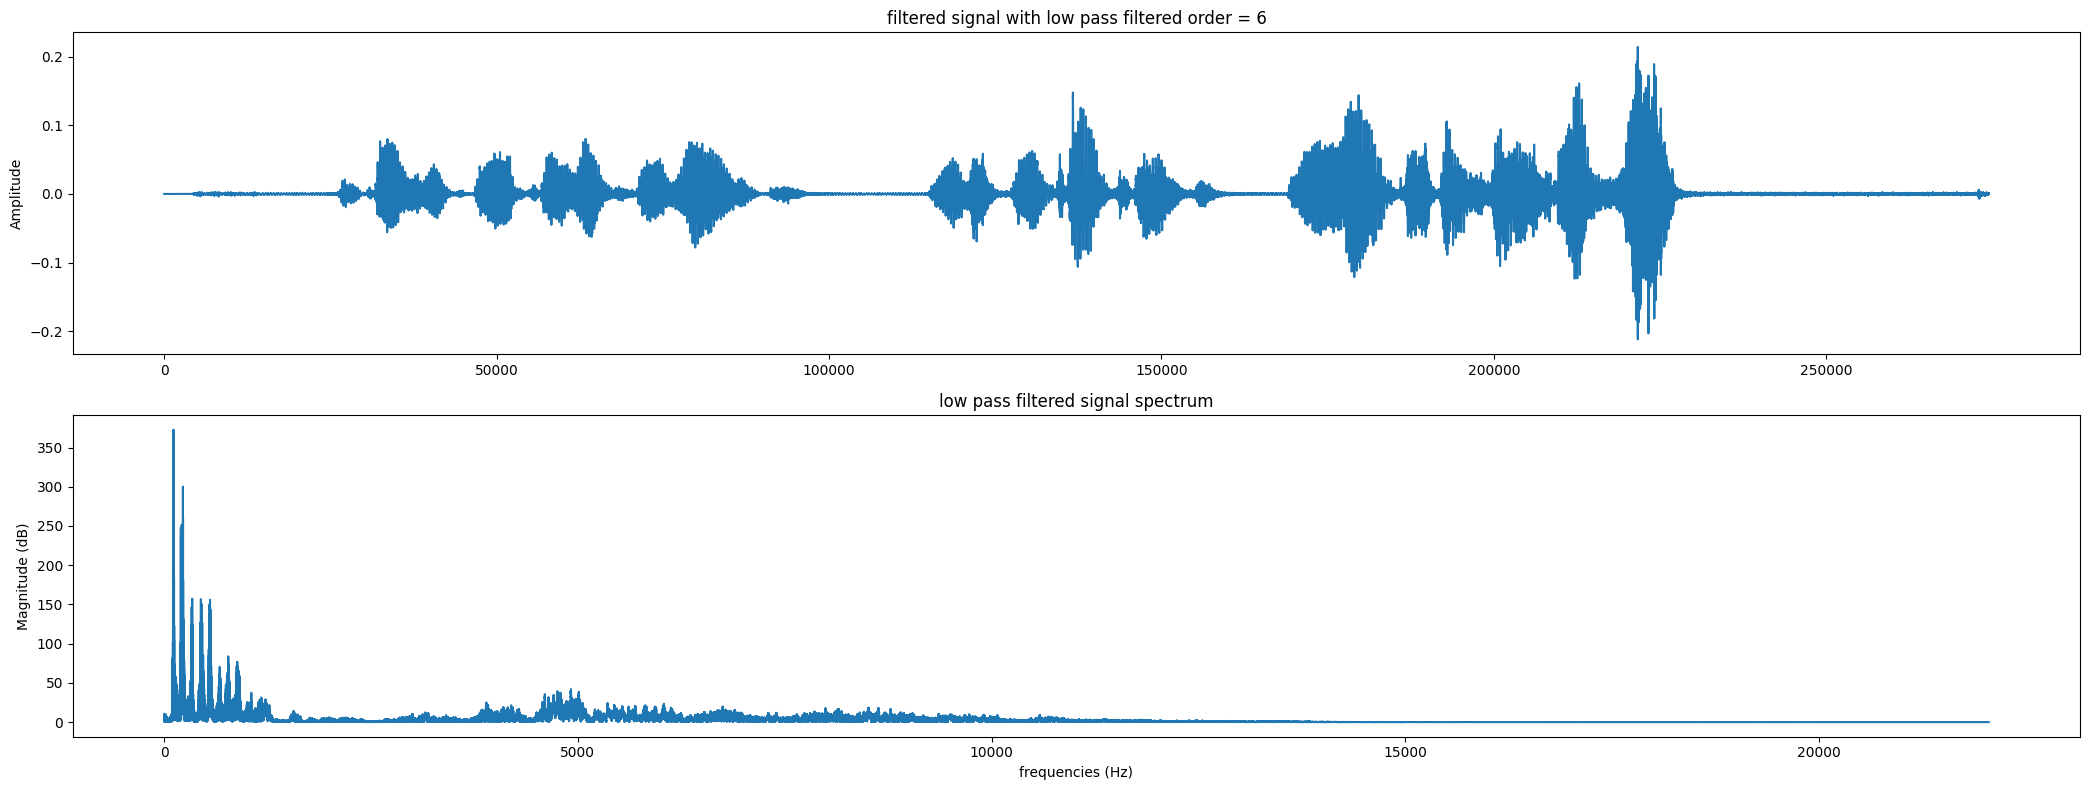

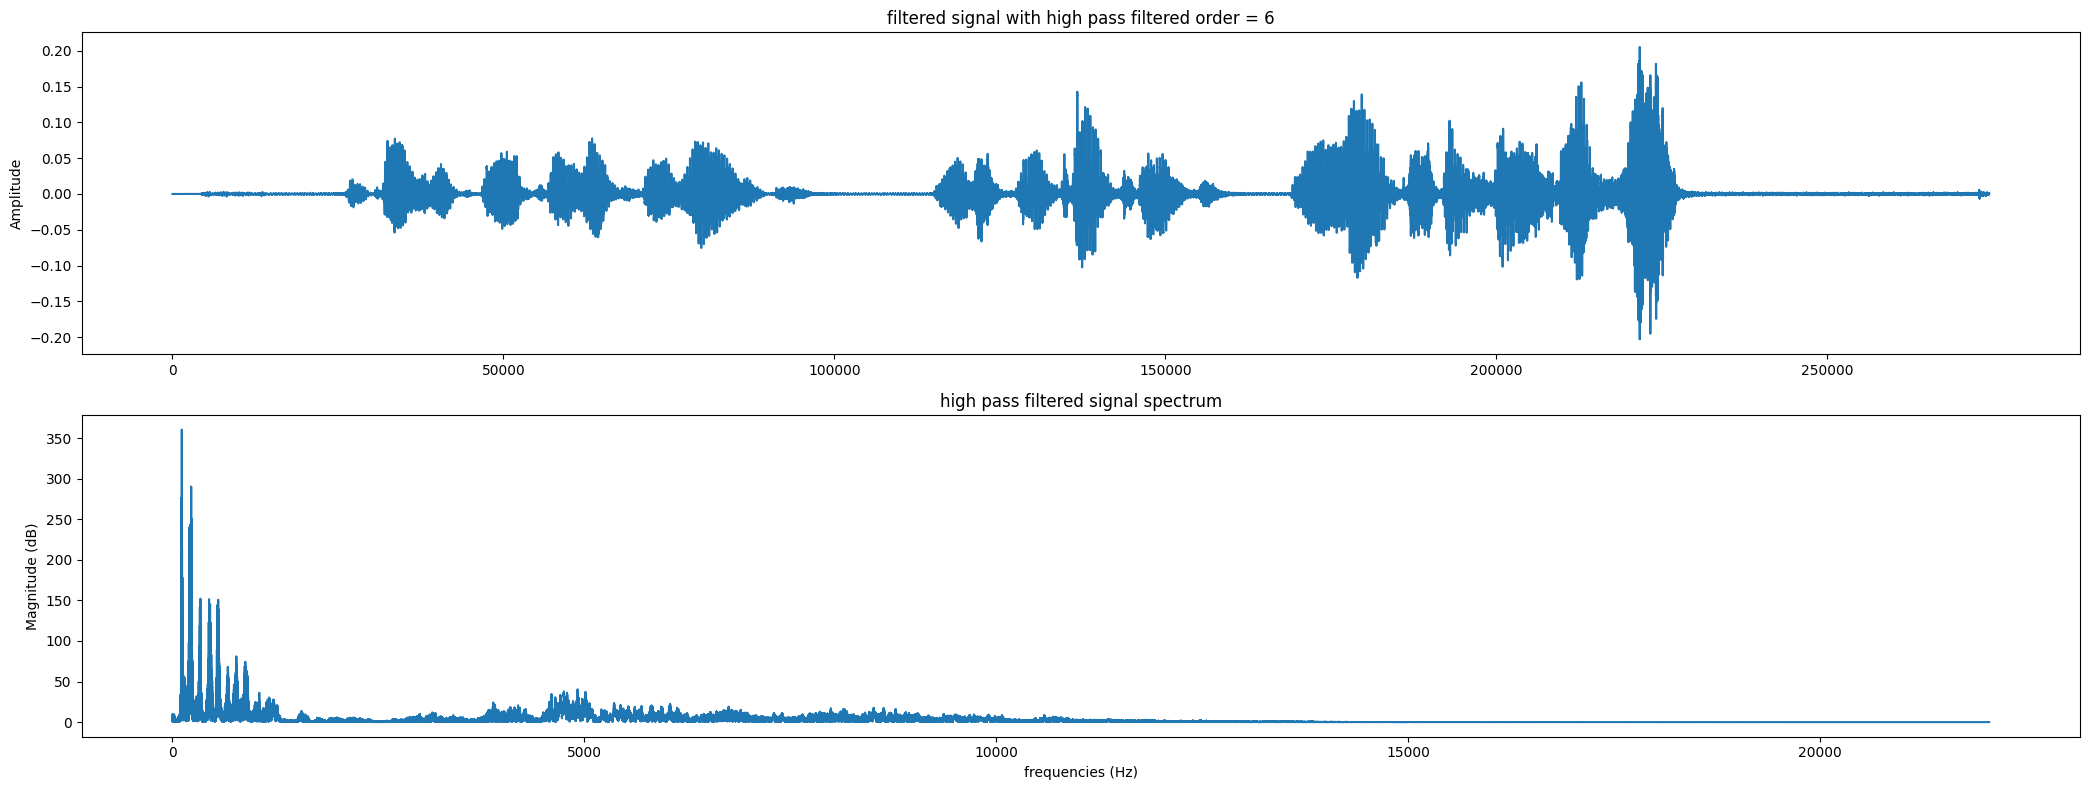

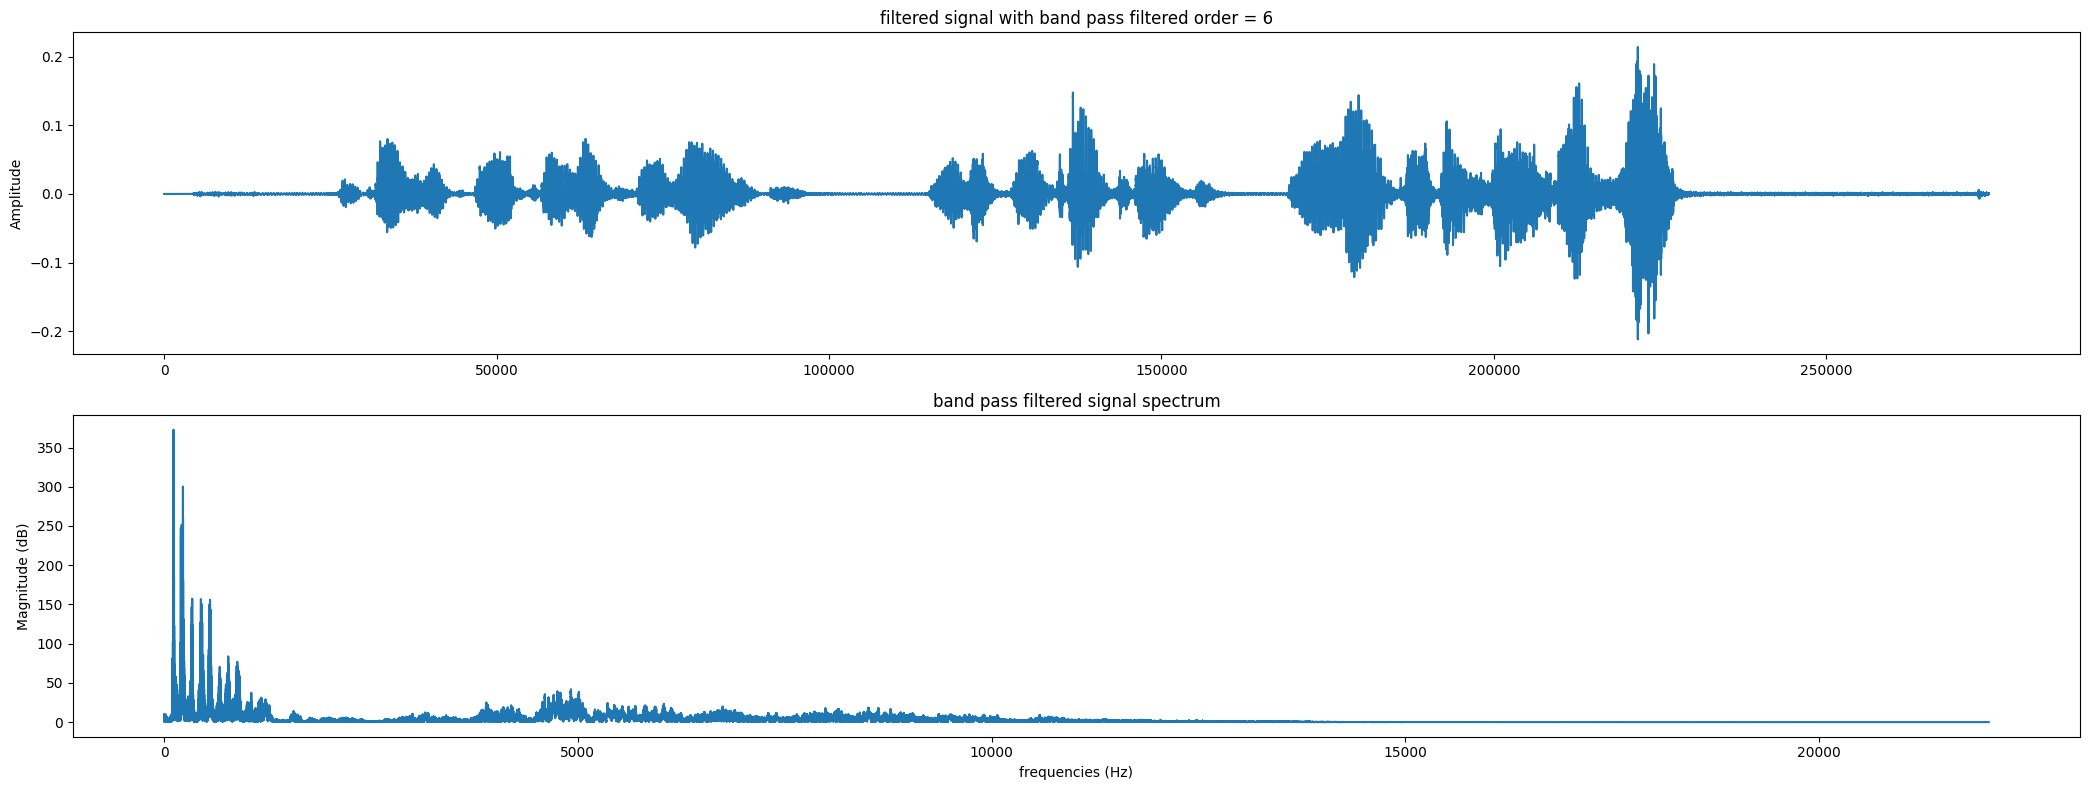

In [36]:
for j in range(len(orders)): 


    print(f'************************* displaying all type of filter results for order = {orders[j]} *******************************************')
    low_pass = fir_low_pass_coeffs[j]
    high_pass_coeff = fir_high_pass_coeffs[j]
    band_pass_coeff = fir_band_pass_coeffs[j]


    filters_coeffs = [low_pass, high_pass_coeff, band_pass_coeff]

    for i in range(3): 

        # Applying the IIR filter to the signal
        filtered_signal = lfilter(filters_coeffs[i], 1.0, signal)  # The second argument is the feedback coefficients. it appears that i should let it be 1

        if i == 0: 
            _type ='low pass'

        if i ==1: 
            _type = 'high pass'

        if i ==2: 
            _type = 'band pass'


        # displaying the fitered signal spectrum and compare it to the original signal spectrum
        fft_filtered_signal = np.fft.fft(filtered_signal)
        fft_filtered_freq = np.fft.fftfreq(len(filtered_signal), 1/fs)
        fig, axs = plt.subplots(2, 1, figsize=(21, 8))

        axs[0].plot(filtered_signal)
        axs[0].set_title(f'filtered signal with {_type} filtered order = {orders[j]}')
        axs[0].set_ylabel('Amplitude')

        

        axs[1].plot(fft_filtered_freq[:len(fft_filtered_freq)//2], np.abs(fft_filtered_signal)[:len(fft_filtered_signal)//2])
        axs[1].set_title(f'{_type} filtered signal spectrum')
        axs[1].set_xlabel('frequencies (Hz)')
        axs[1].set_ylabel('Magnitude (dB)')


        plt.tight_layout()
        plt.show()

        print('\n')

# 4 Adding Noise and Re-filtering with FIR and IIR Filters

### 4.1 Adding white gaussian noise and plotting in time/frequency domains

In [37]:
signal_pow = np.mean(signal**2)
snr = 20
noise_power = signal_pow / (10**(snr / 10))
noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)


noisy_signal = signal + noise

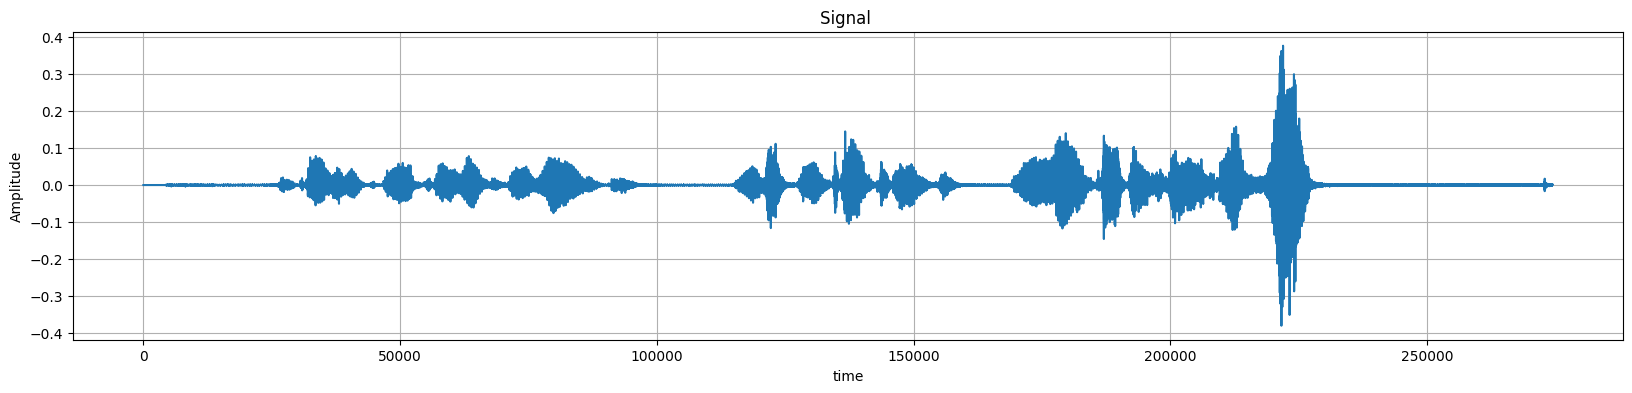

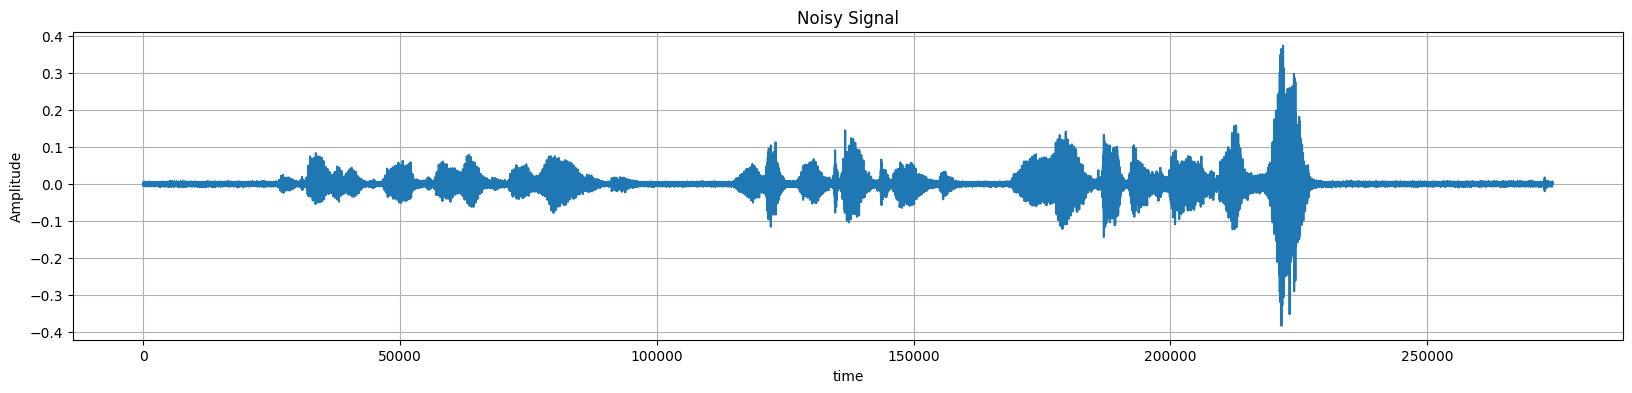

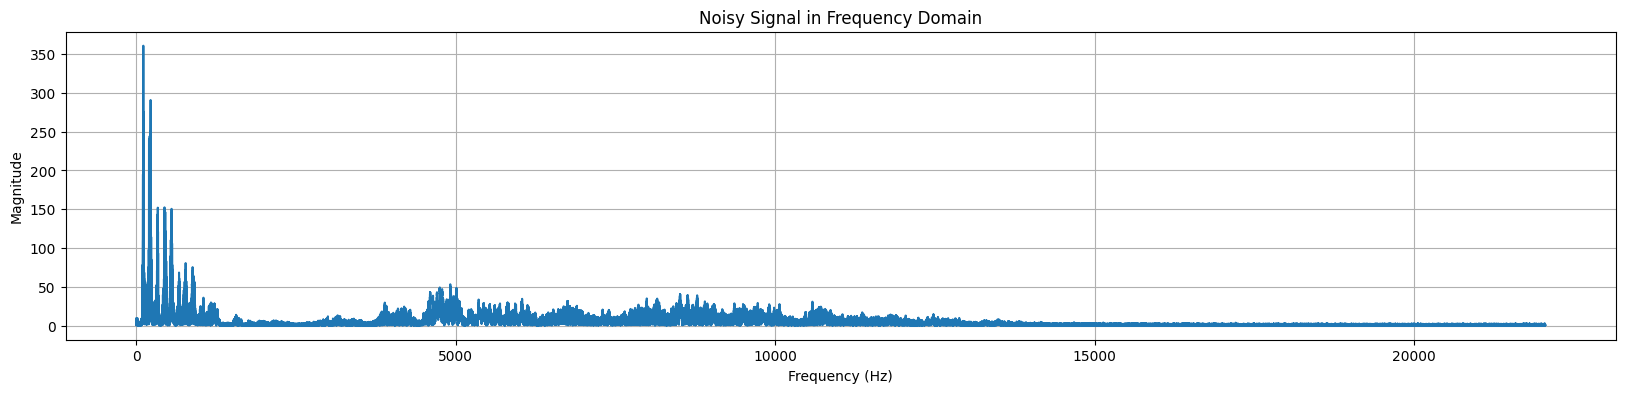

In [39]:
plt.figure(figsize=(20, 4))
plt.plot(signal)
plt.title('Signal ')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


plt.figure(figsize=(20, 4))
plt.plot(noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

fft_noisy_signal = np.fft.fft(noisy_signal)
fft_noisy_freq = np.fft.fftfreq(len(noisy_signal), 1/fs)

# Plot the noisy signal in the frequency domain
plt.figure(figsize=(20, 4))
plt.plot(fft_noisy_freq[:len(fft_noisy_freq)//2], np.abs(fft_noisy_signal)[:len(fft_noisy_signal)//2])
plt.title('Noisy Signal in Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

### 4.2 Filtering the Noisy Signal with IIR and FIR Filters

#### 4.2.1 FIR filter

************************* displaying all type of filter results for order = 2 *******************************************


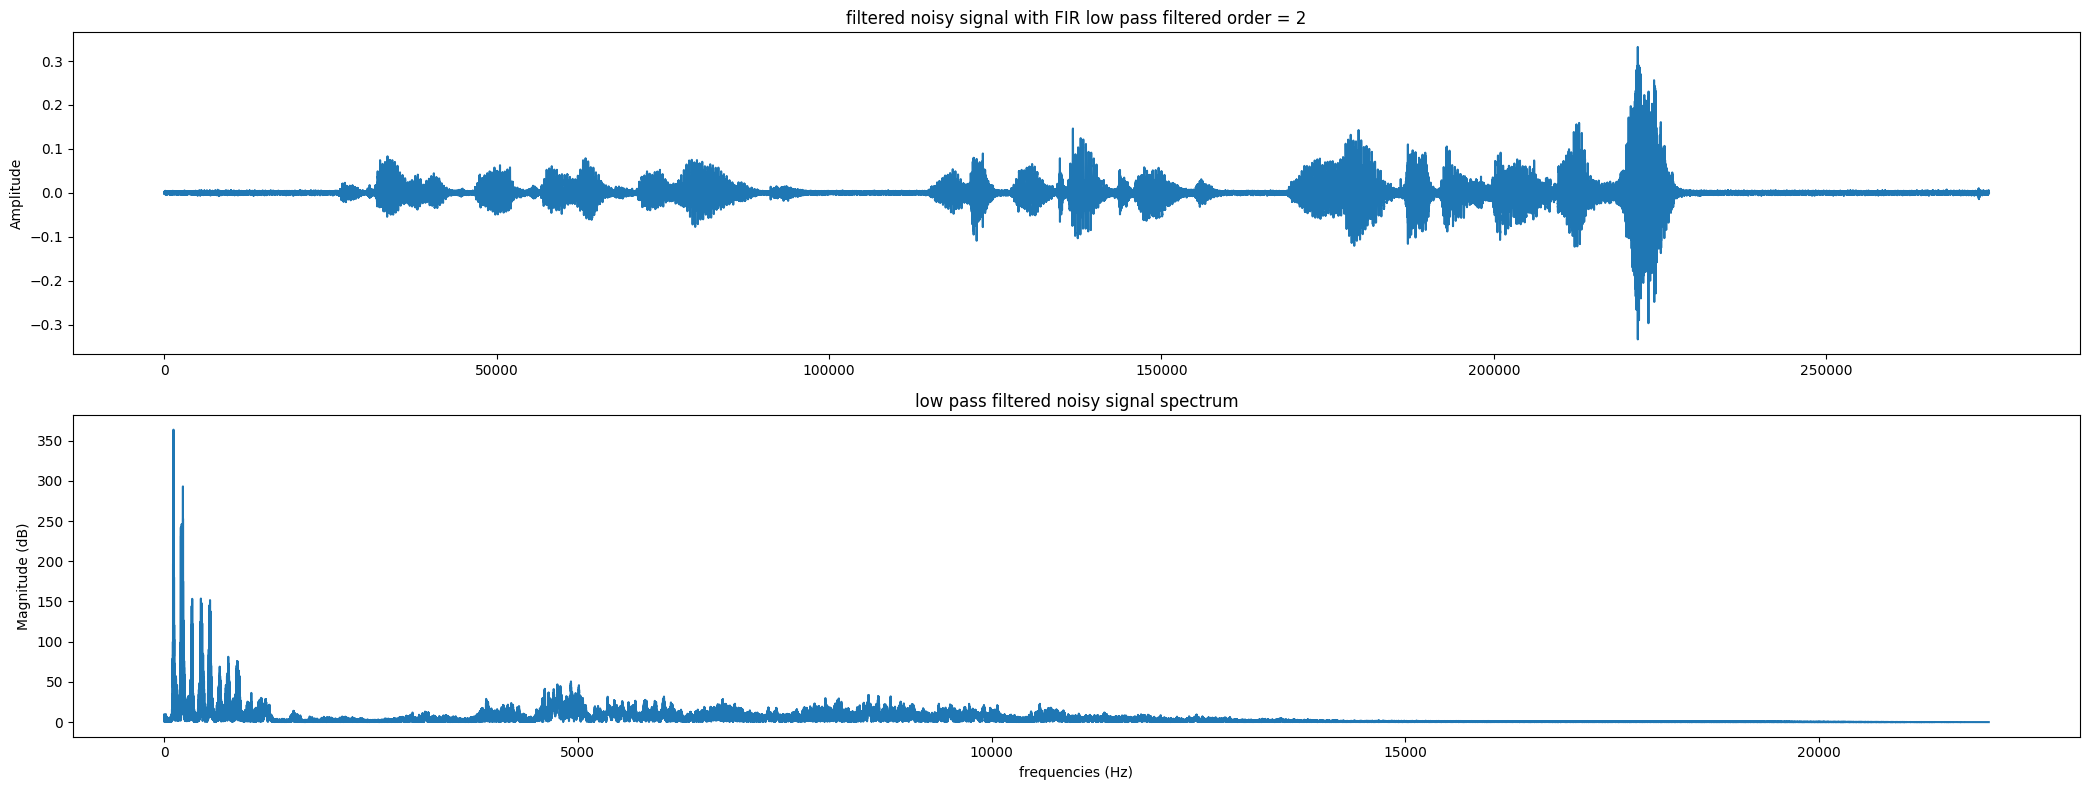

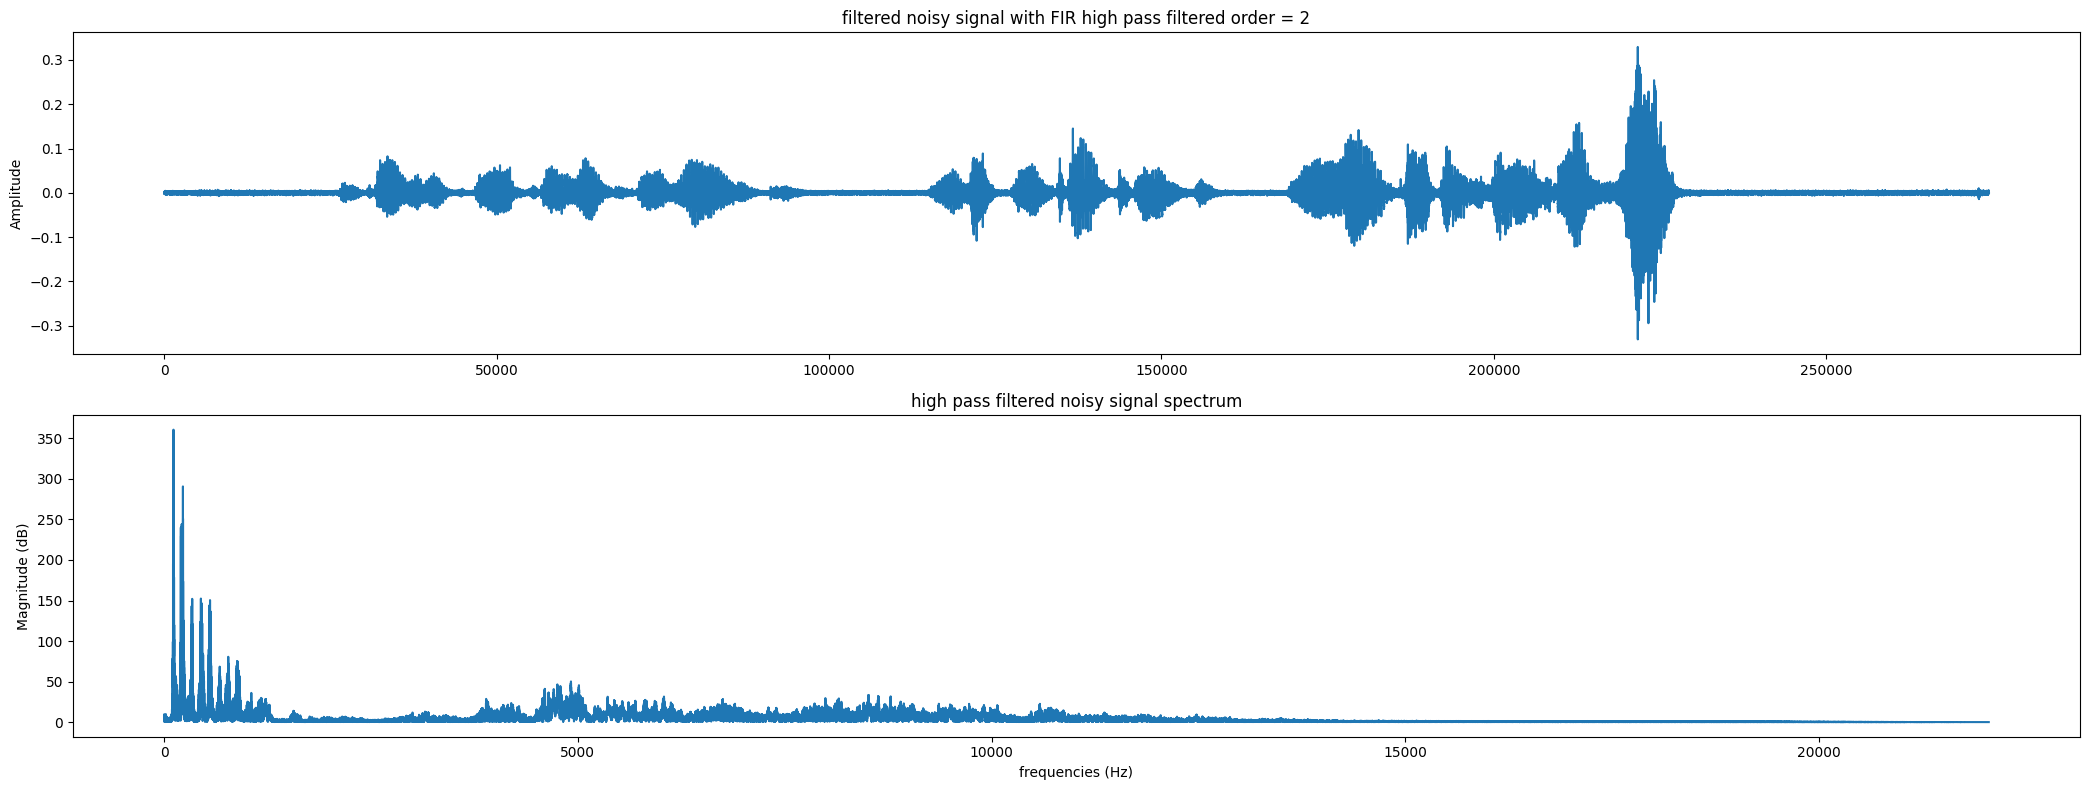

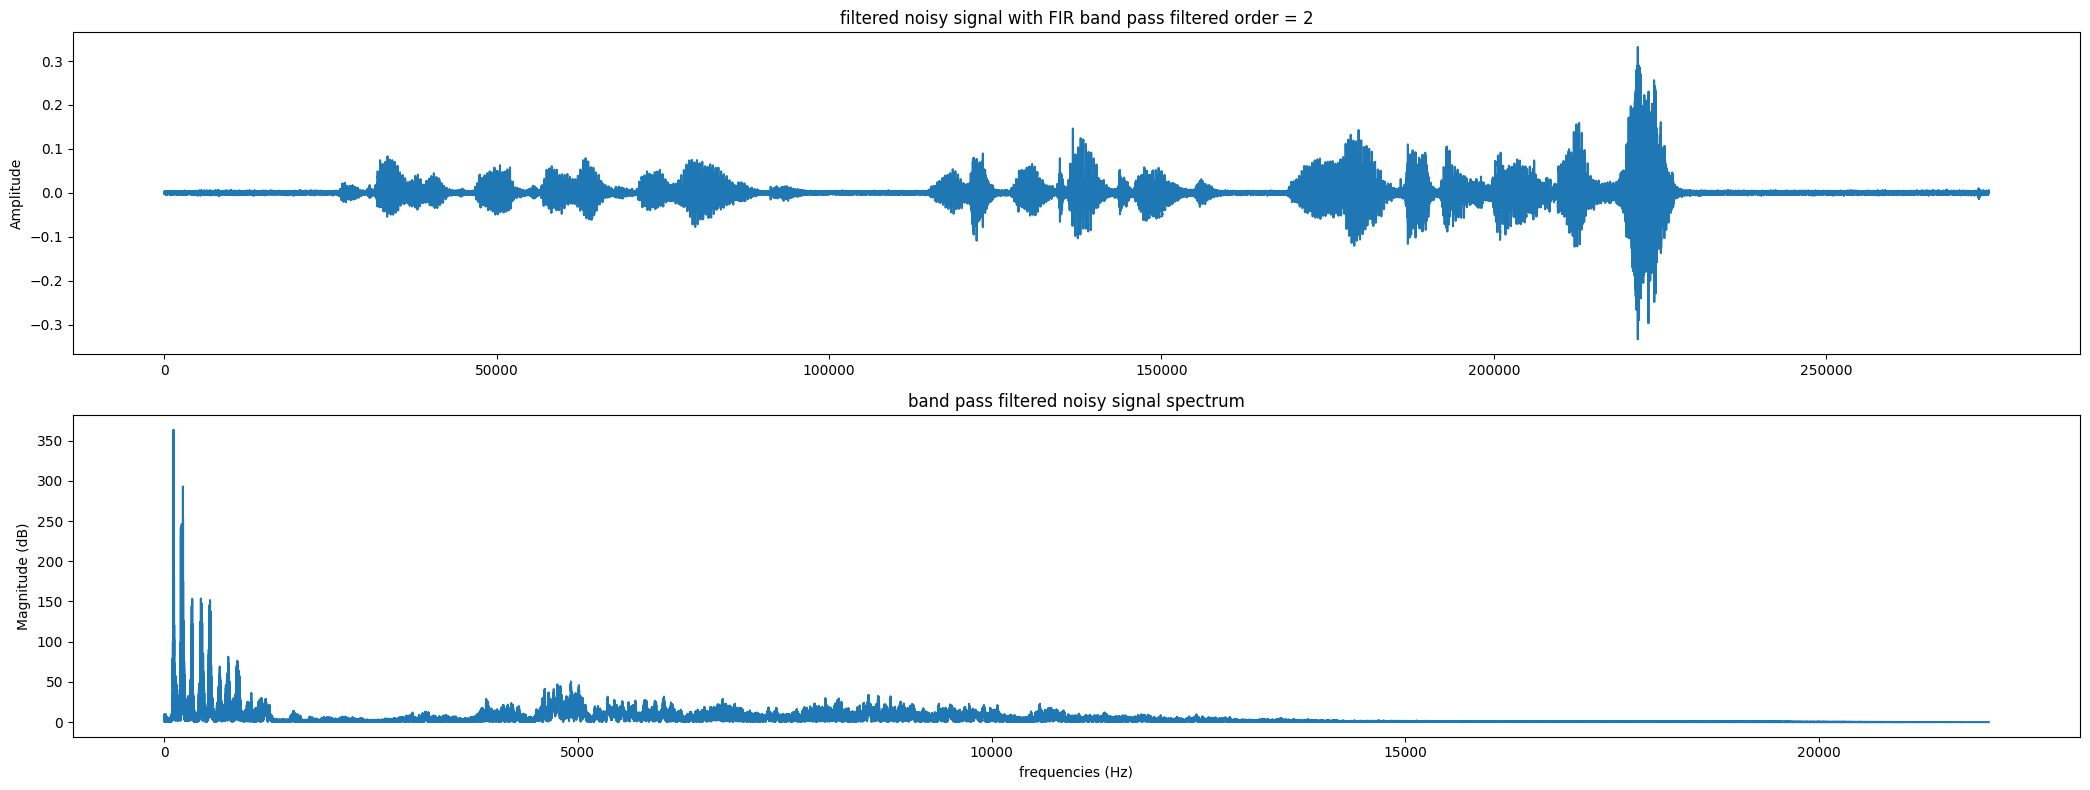



************************* displaying all type of filter results for order = 4 *******************************************


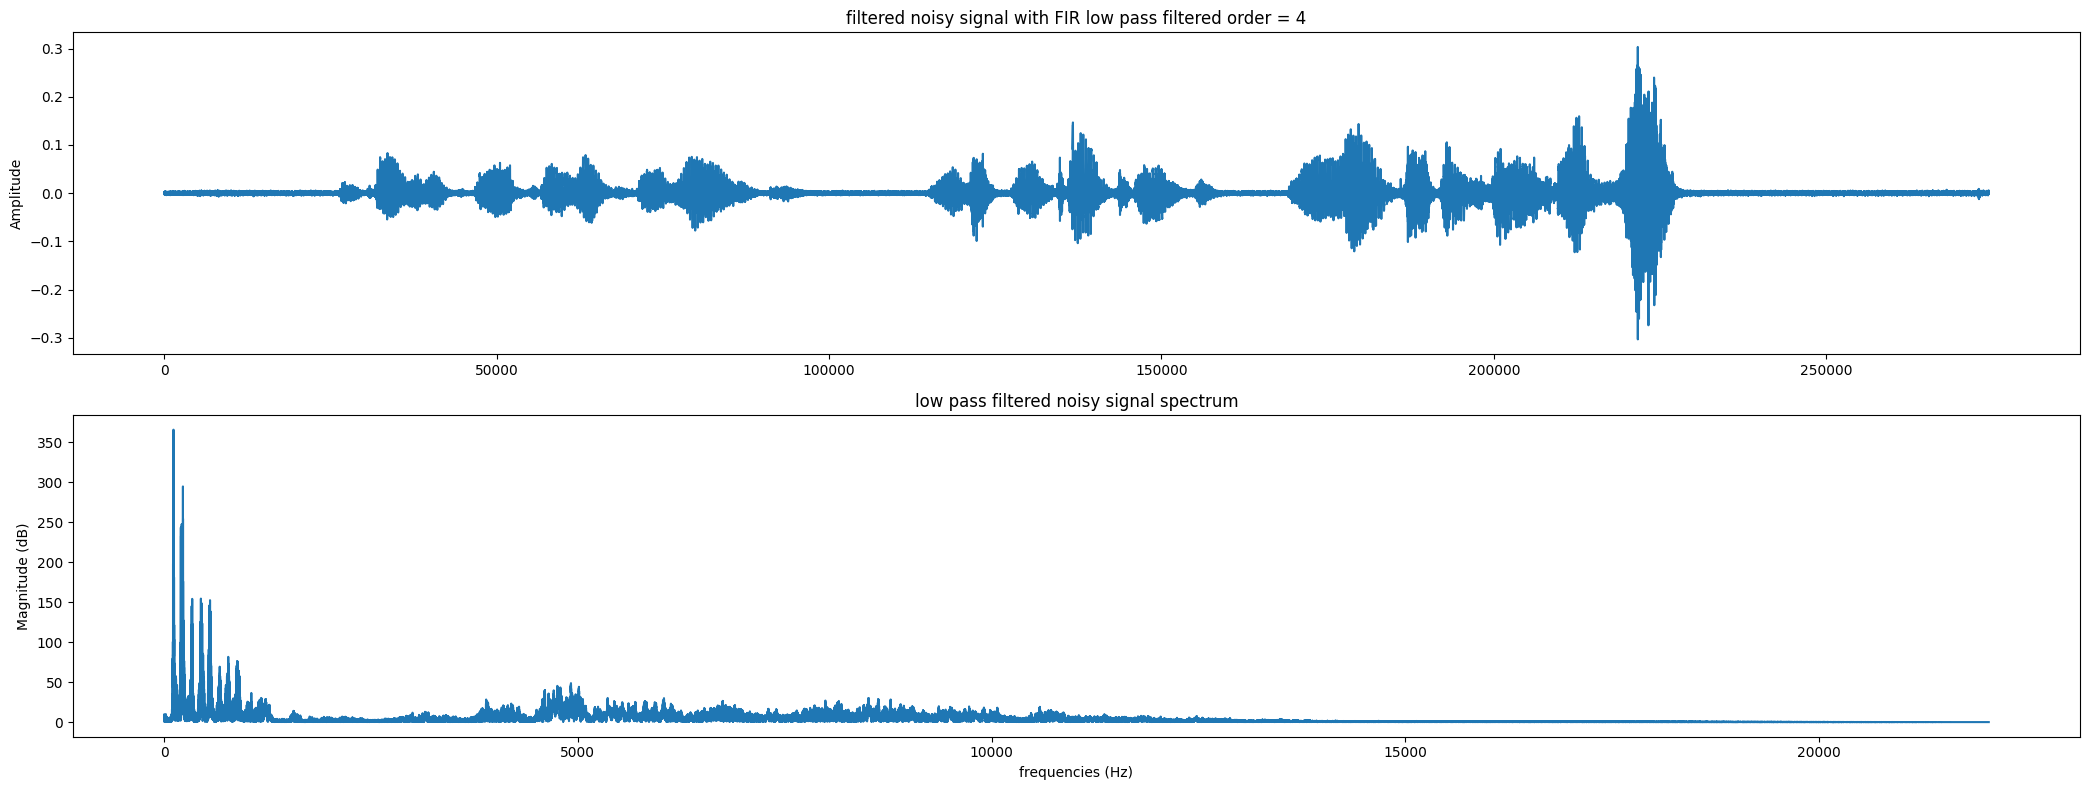

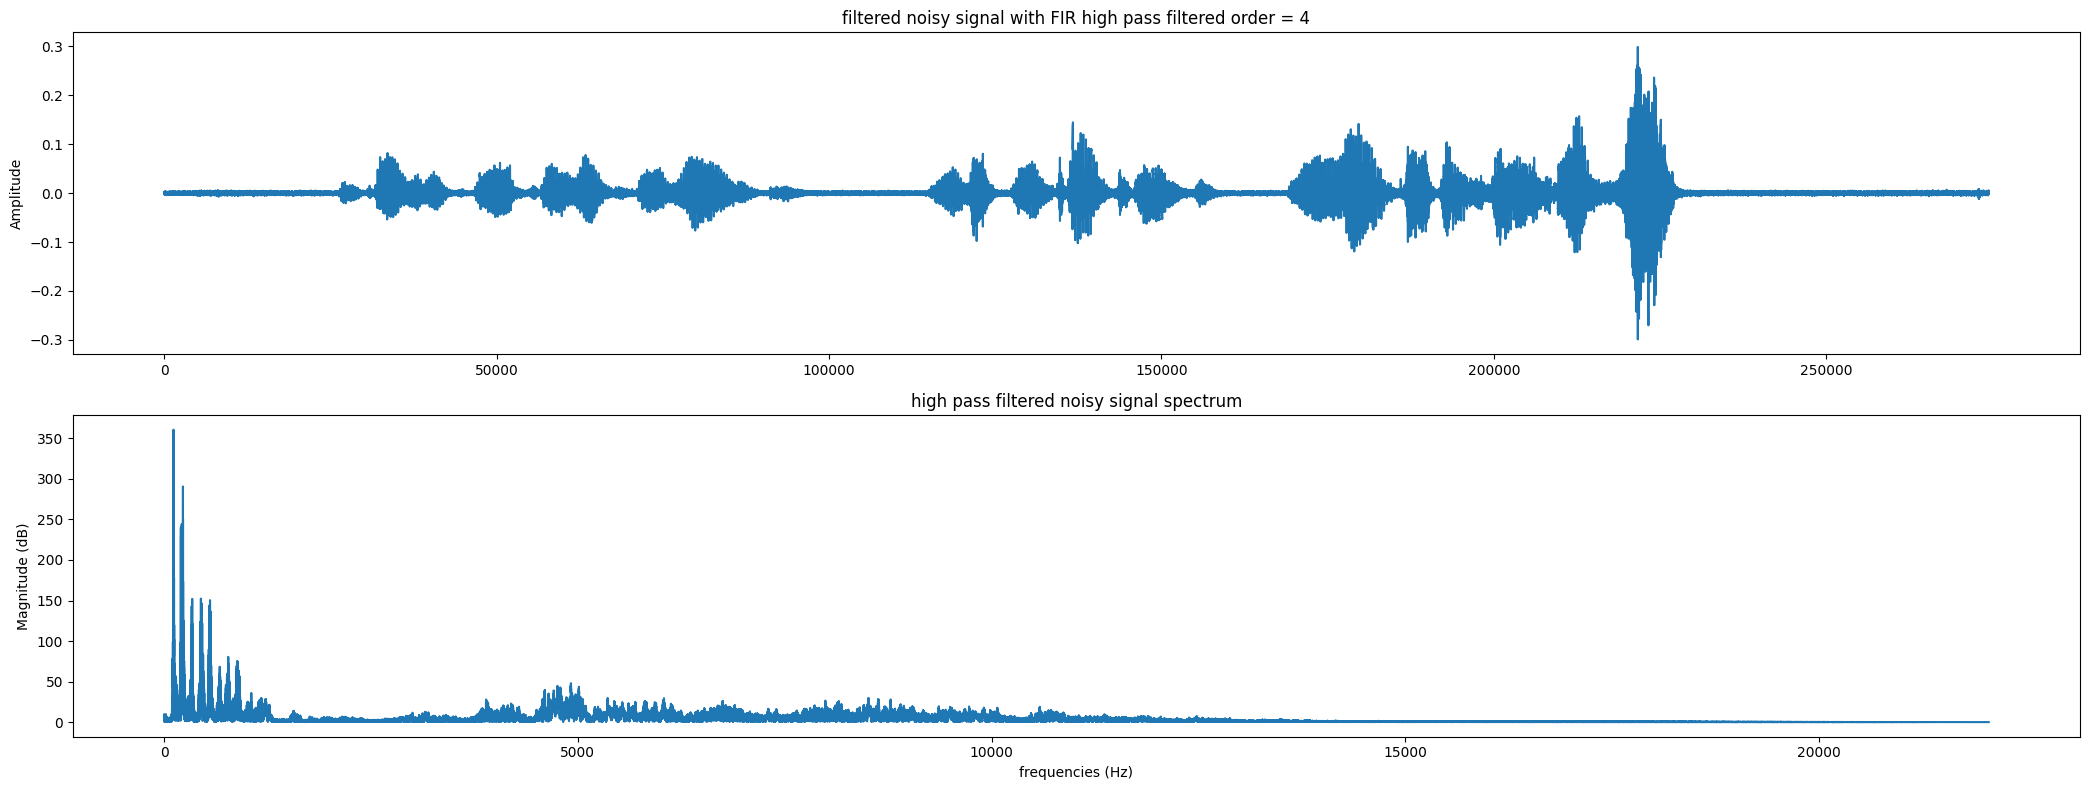

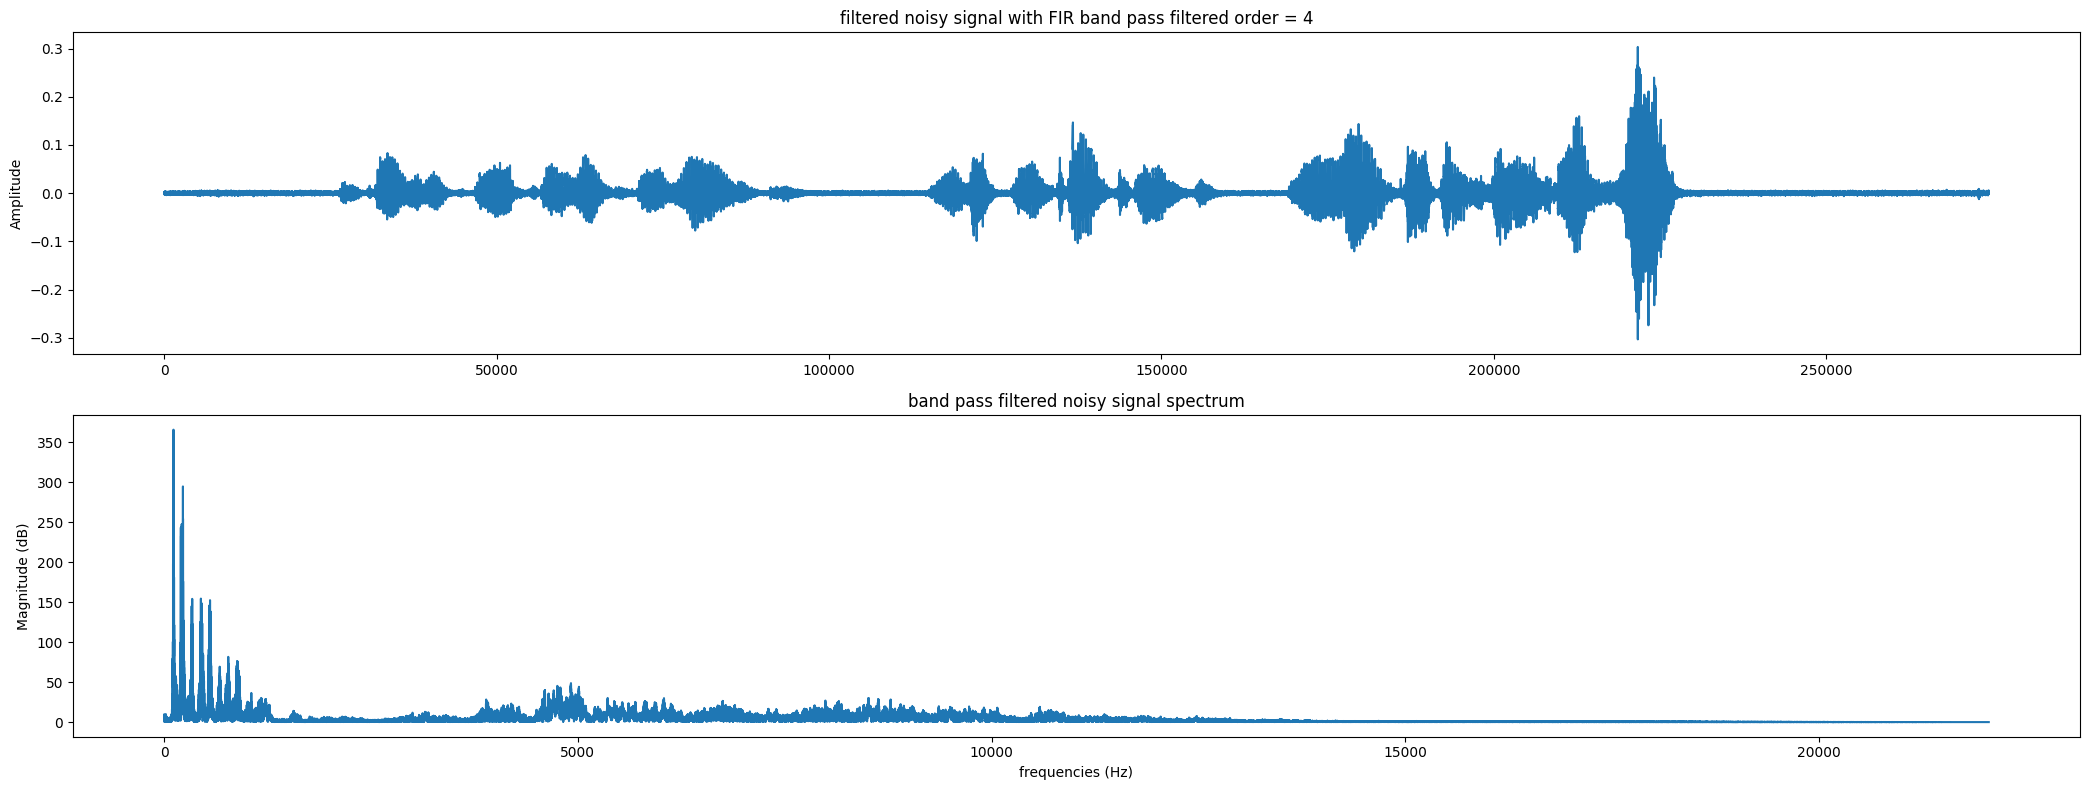



************************* displaying all type of filter results for order = 6 *******************************************


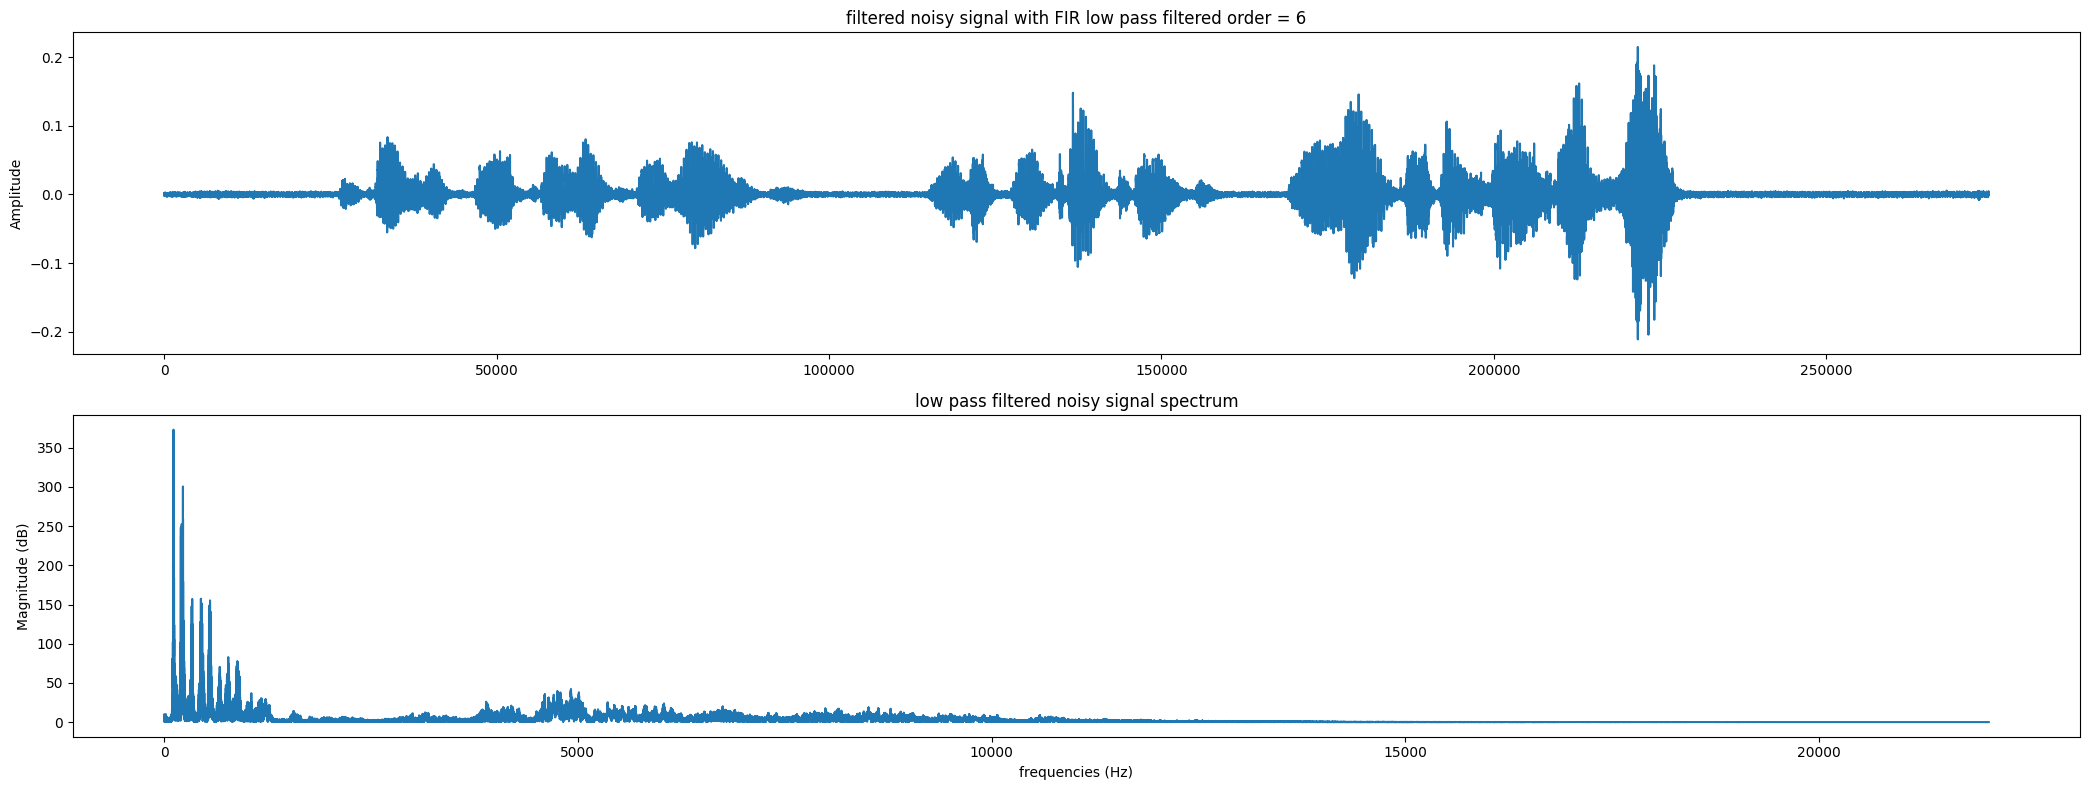

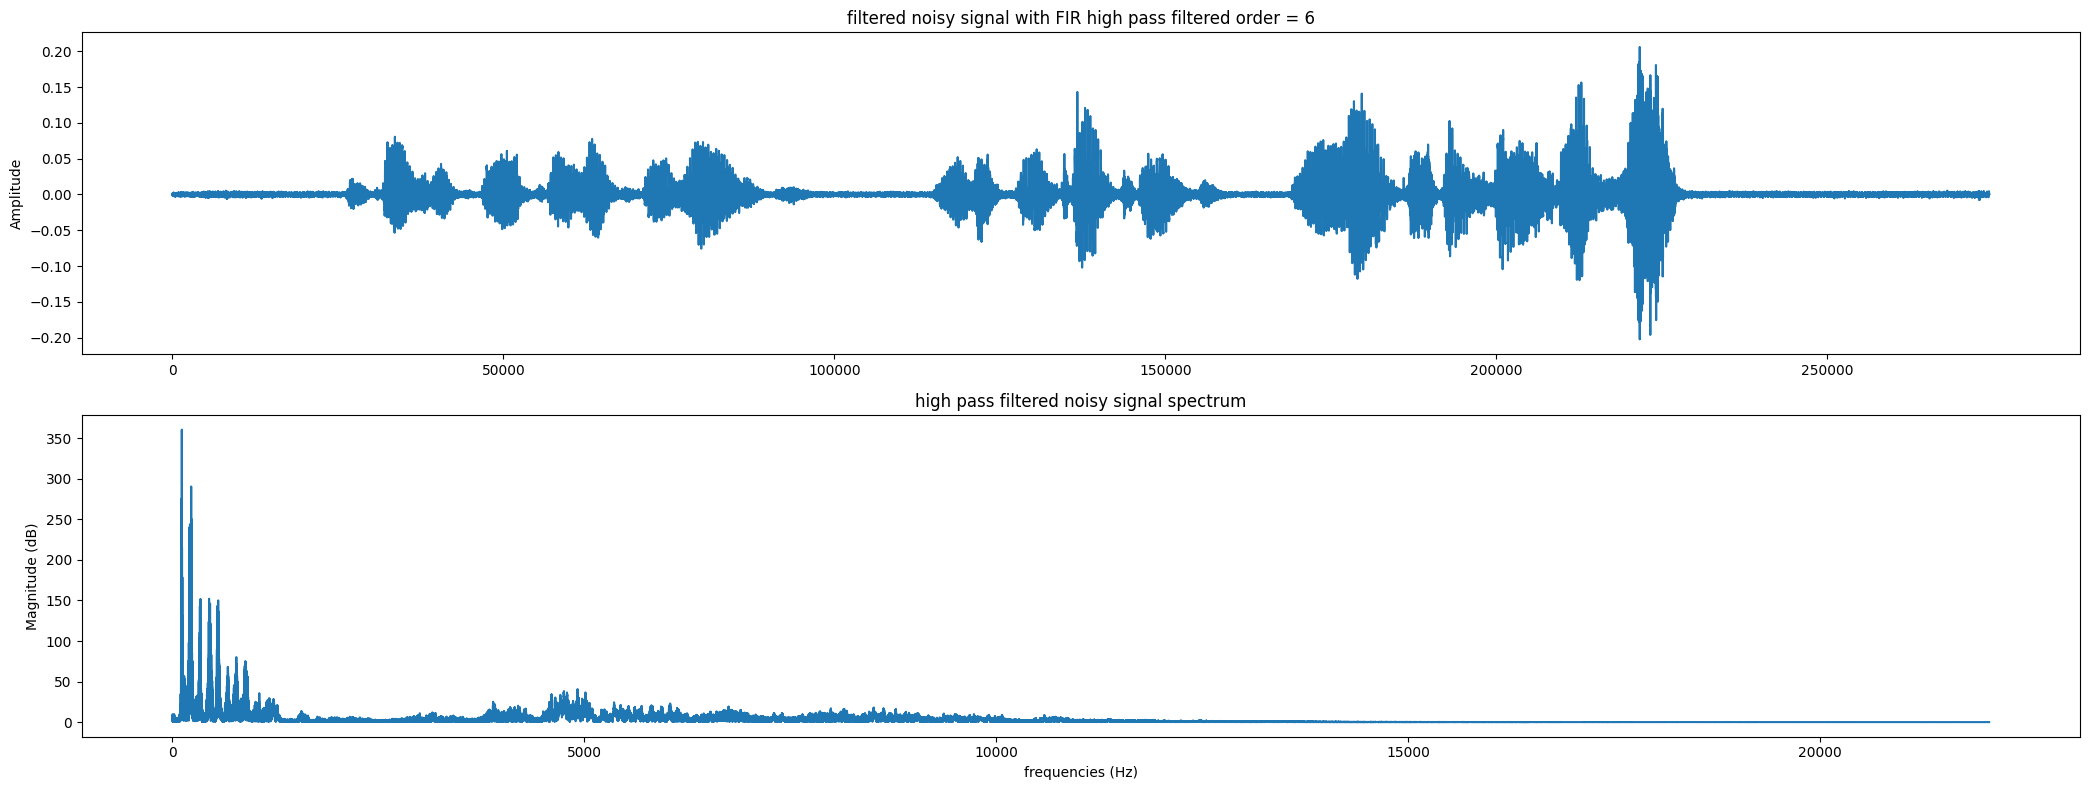

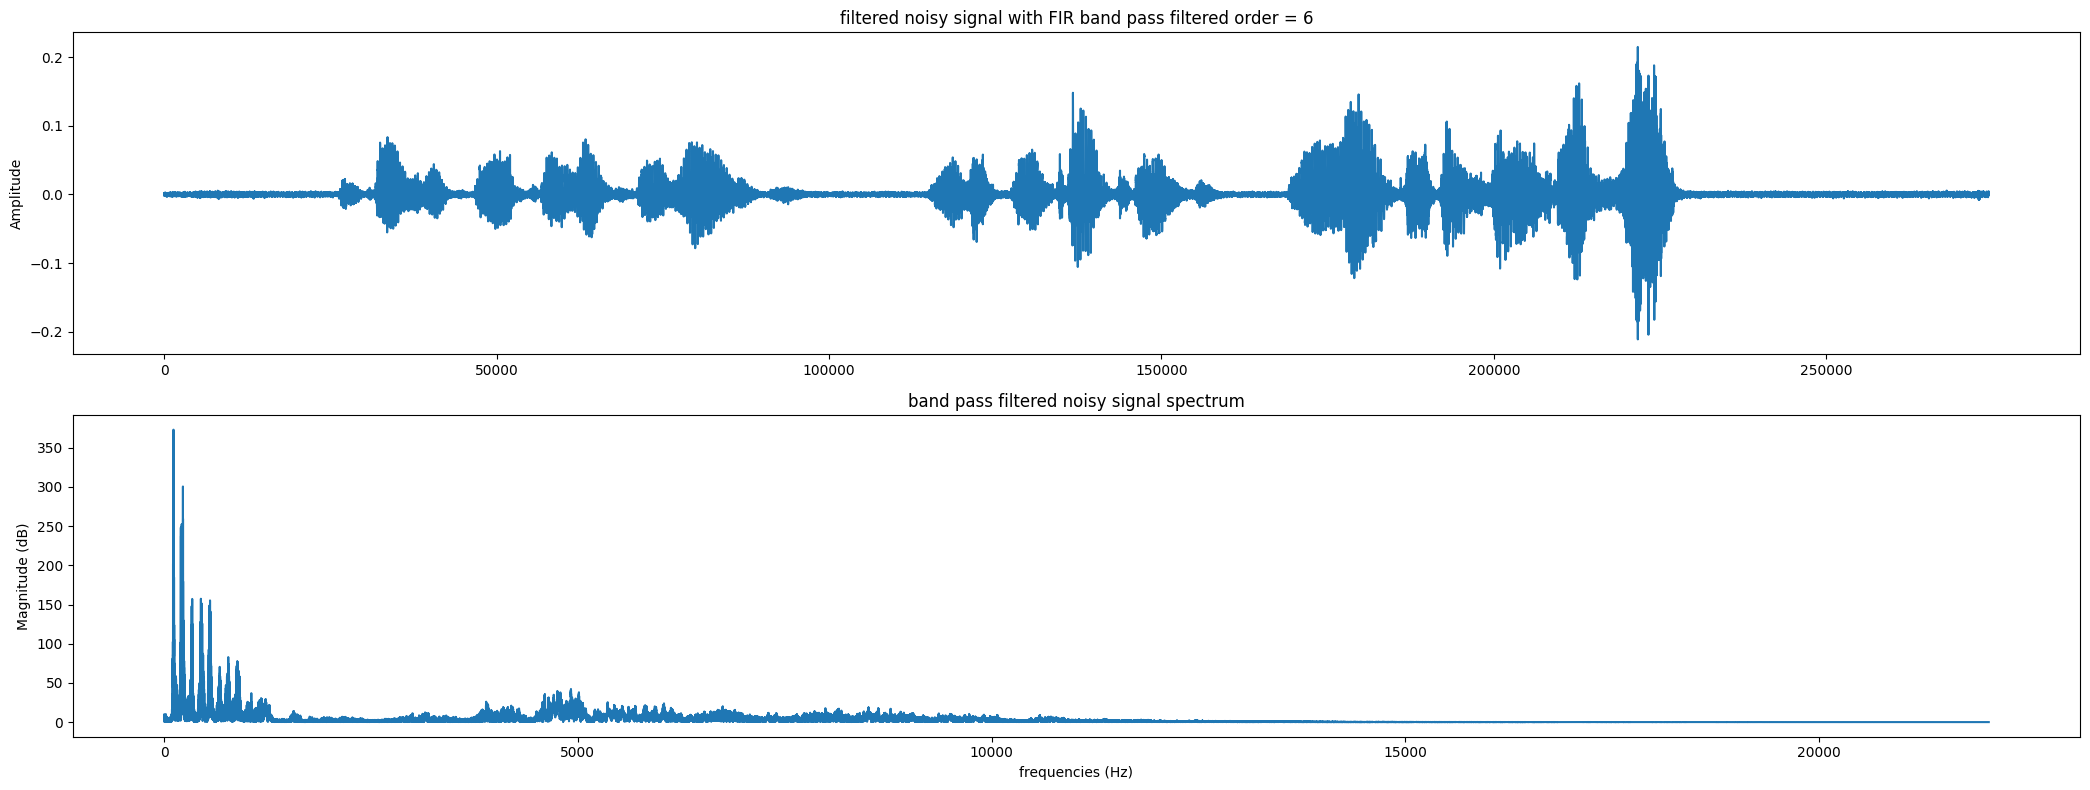

In [41]:
for j in range(len(orders)): 


    print(f'************************* displaying all type of filter results for order = {orders[j]} *******************************************')
    low_pass = fir_low_pass_coeffs[j]
    high_pass_coeff = fir_high_pass_coeffs[j]
    band_pass_coeff = fir_band_pass_coeffs[j]


    filters_coeffs = [low_pass, high_pass_coeff, band_pass_coeff]

    for i in range(3): 

        # Applying the IIR filter to the signal
        filtered_noisy_signal = lfilter(filters_coeffs[i], 1.0, noisy_signal)  # The second argument is the feedback coefficients. it appears that i should let it be 1

        if i == 0: 
            _type ='low pass'

        if i ==1: 
            _type = 'high pass'

        if i ==2: 
            _type = 'band pass'


        # displaying the fitered signal spectrum and compare it to the original signal spectrum
        fft_filtered_signal = np.fft.fft(filtered_noisy_signal)
        fft_filtered_freq = np.fft.fftfreq(len(filtered_noisy_signal), 1/fs)
        fig, axs = plt.subplots(2, 1, figsize=(21, 8))

        axs[0].plot(filtered_noisy_signal)
        axs[0].set_title(f'filtered noisy signal with FIR {_type} filtered order = {orders[j]}')
        axs[0].set_ylabel('Amplitude')

        

        axs[1].plot(fft_filtered_freq[:len(fft_filtered_freq)//2], np.abs(fft_filtered_signal)[:len(fft_filtered_signal)//2])
        axs[1].set_title(f'{_type} filtered noisy signal spectrum')
        axs[1].set_xlabel('frequencies (Hz)')
        axs[1].set_ylabel('Magnitude (dB)')


        plt.tight_layout()
        plt.show()

        print('\n')

#### 4.2.2 IIR filters

************************* displaying all type of filter results for order = 2 *******************************************


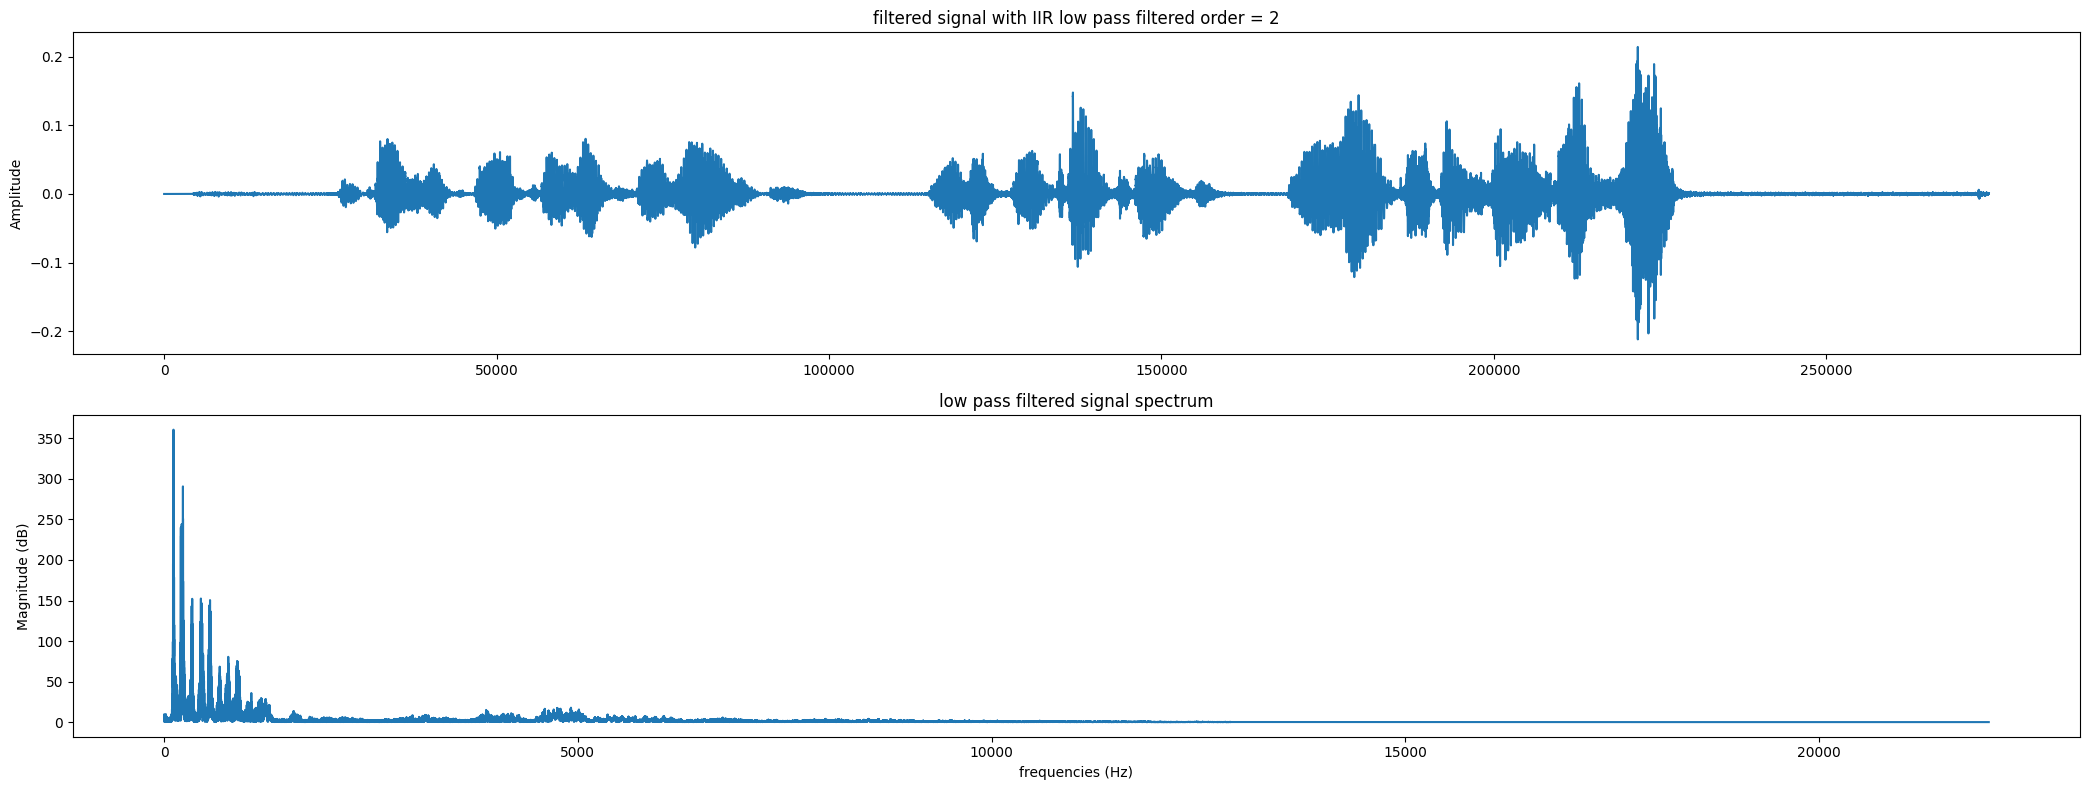

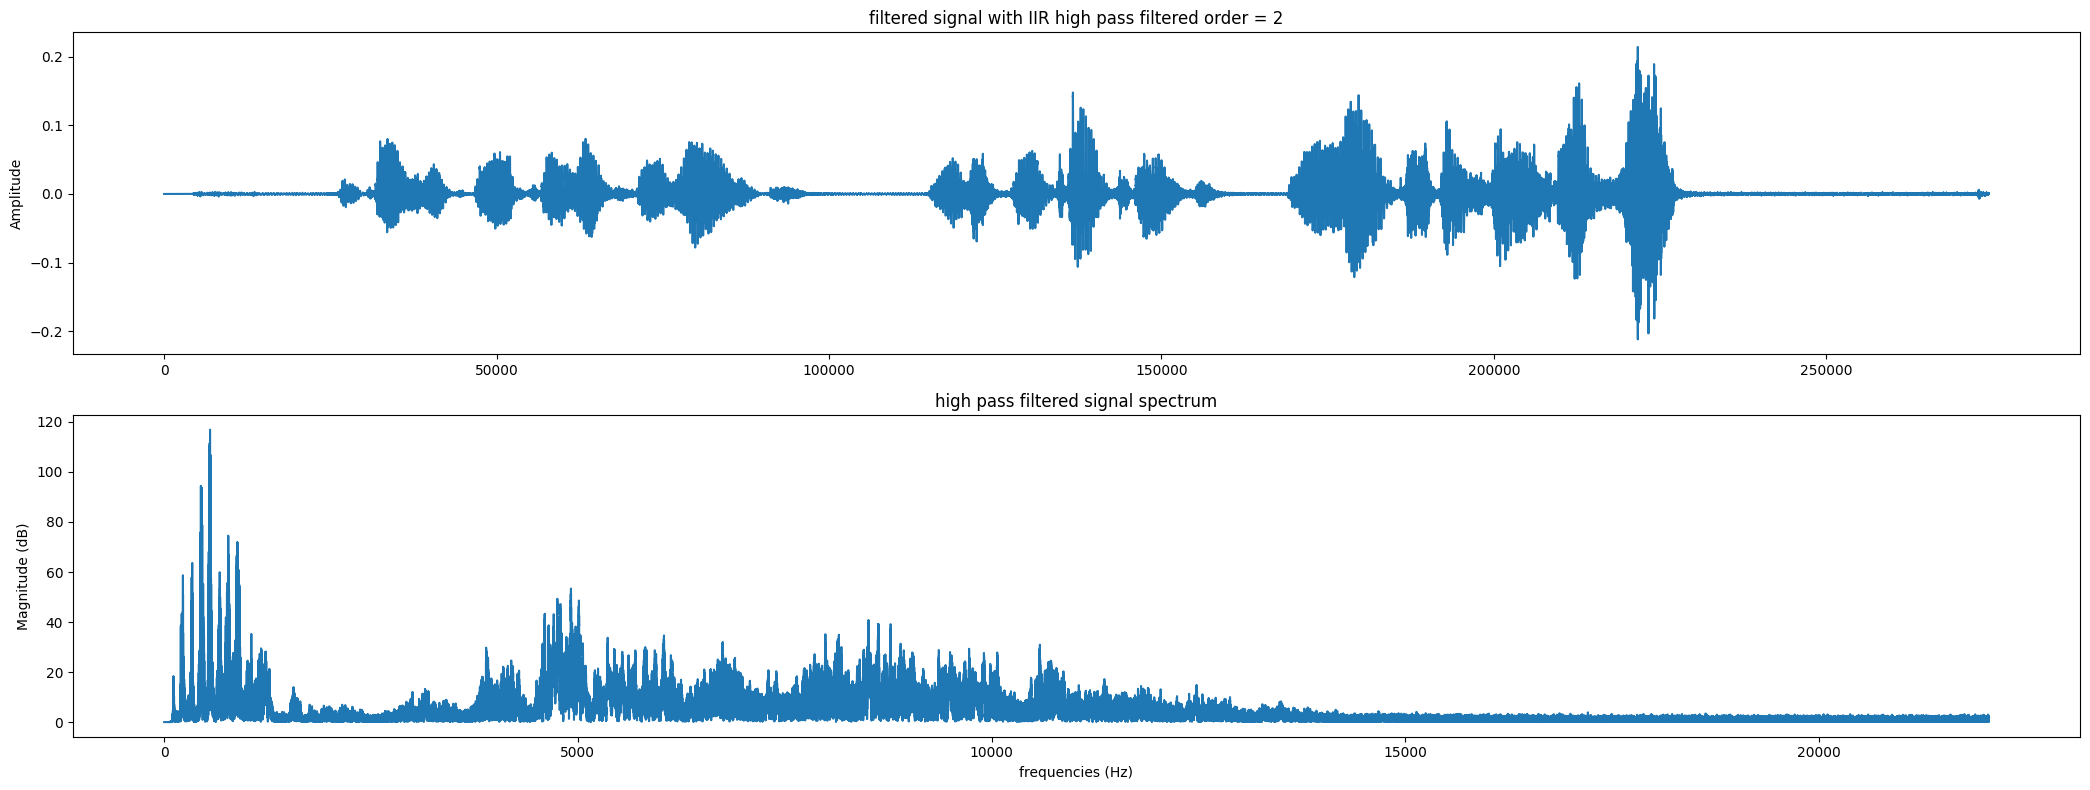

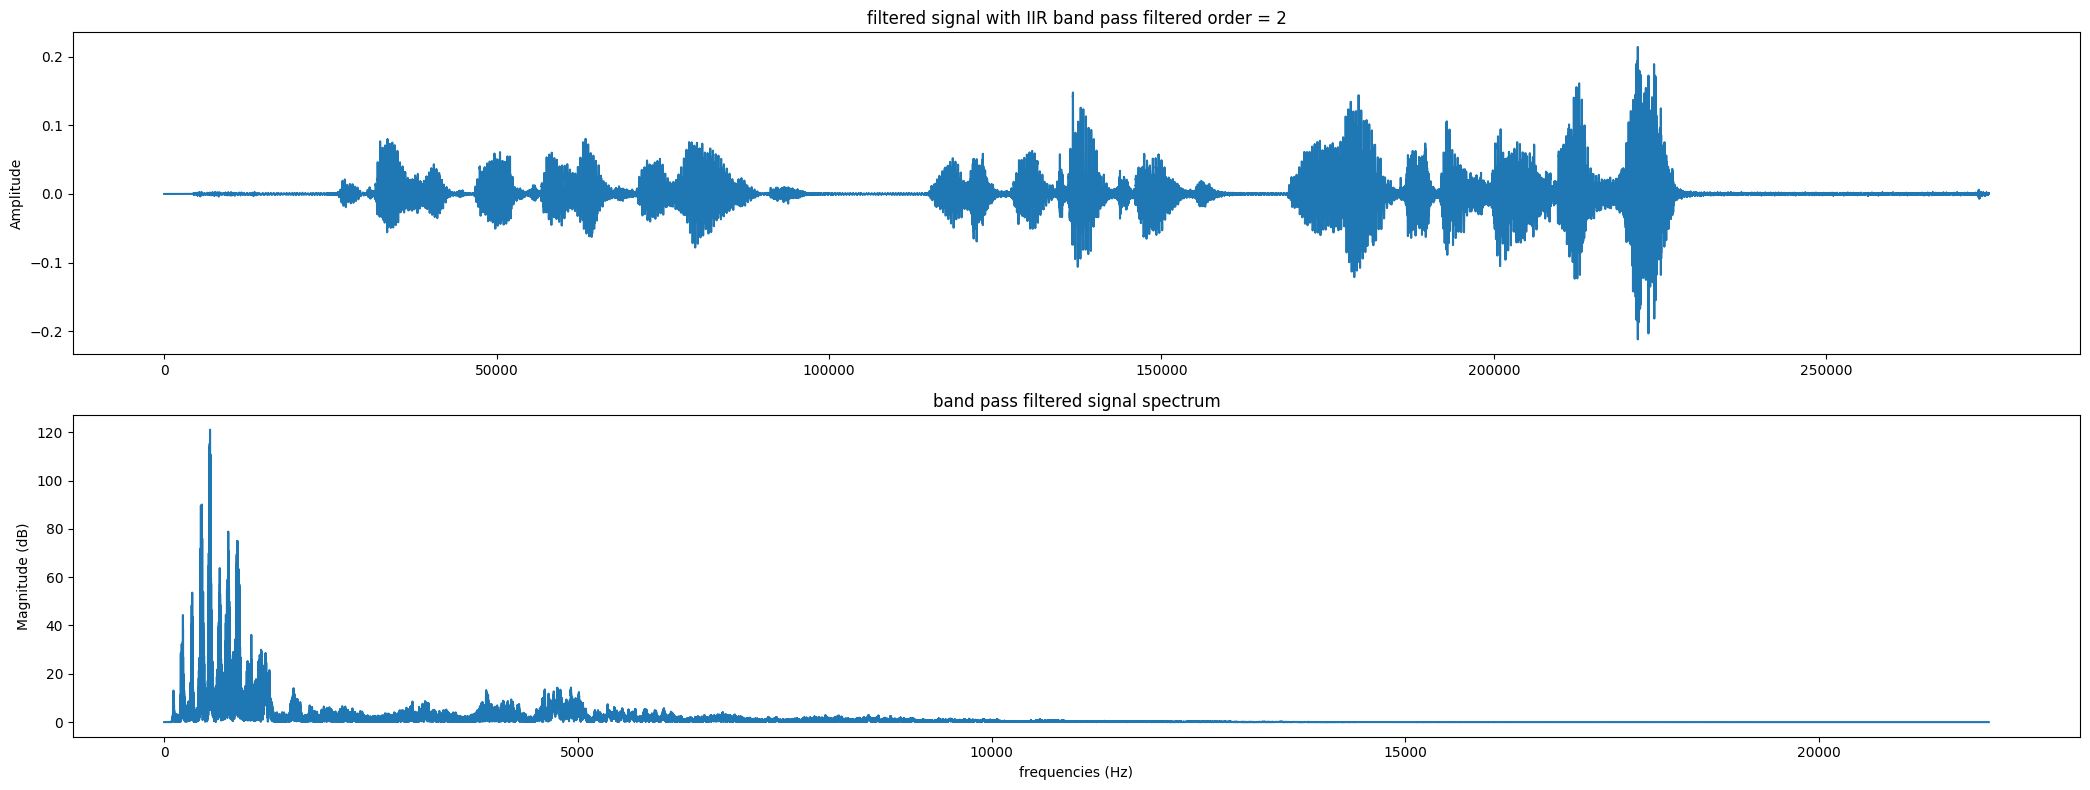



************************* displaying all type of filter results for order = 4 *******************************************


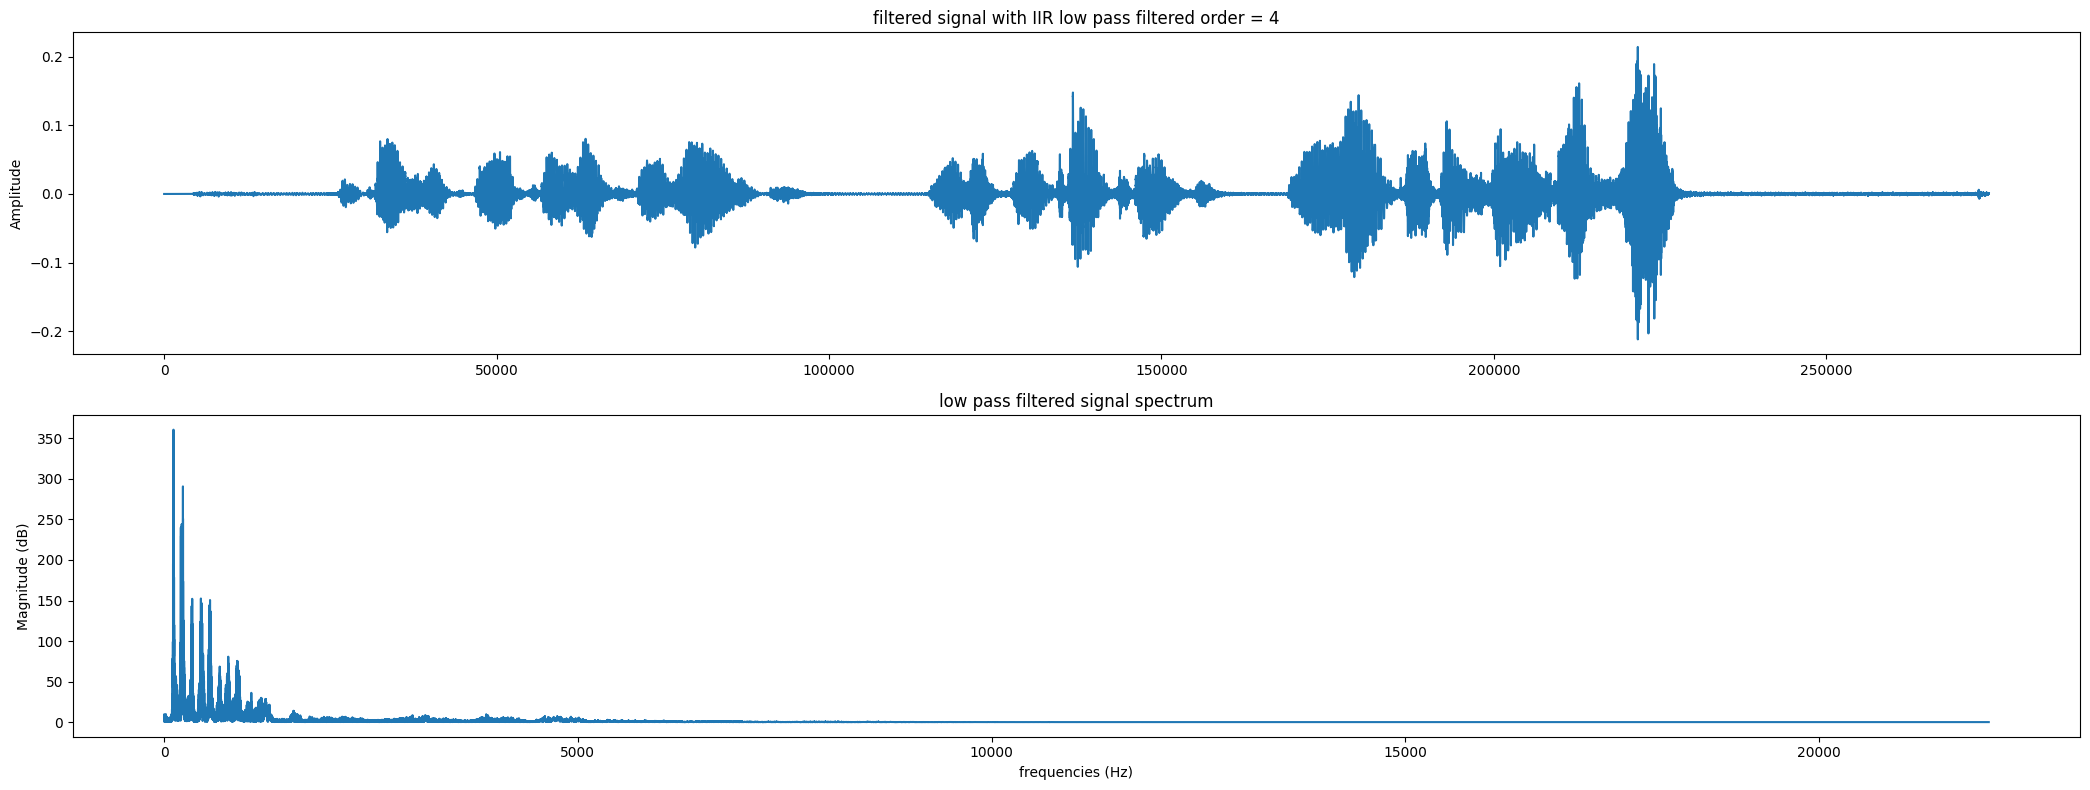

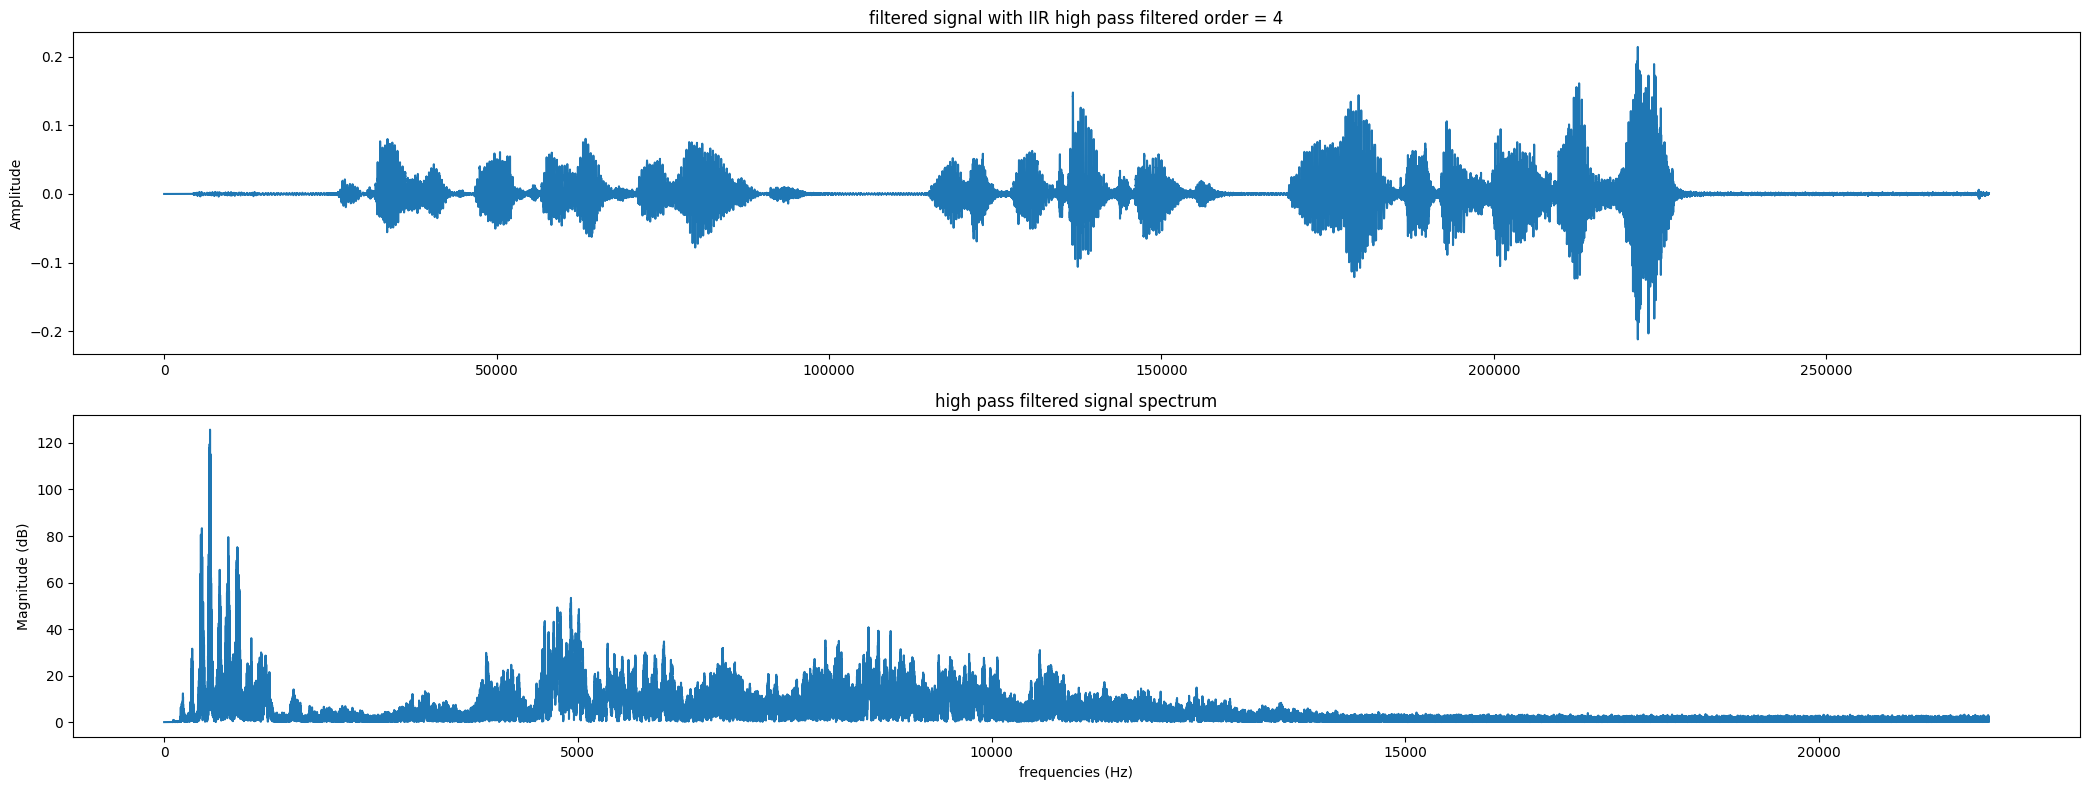

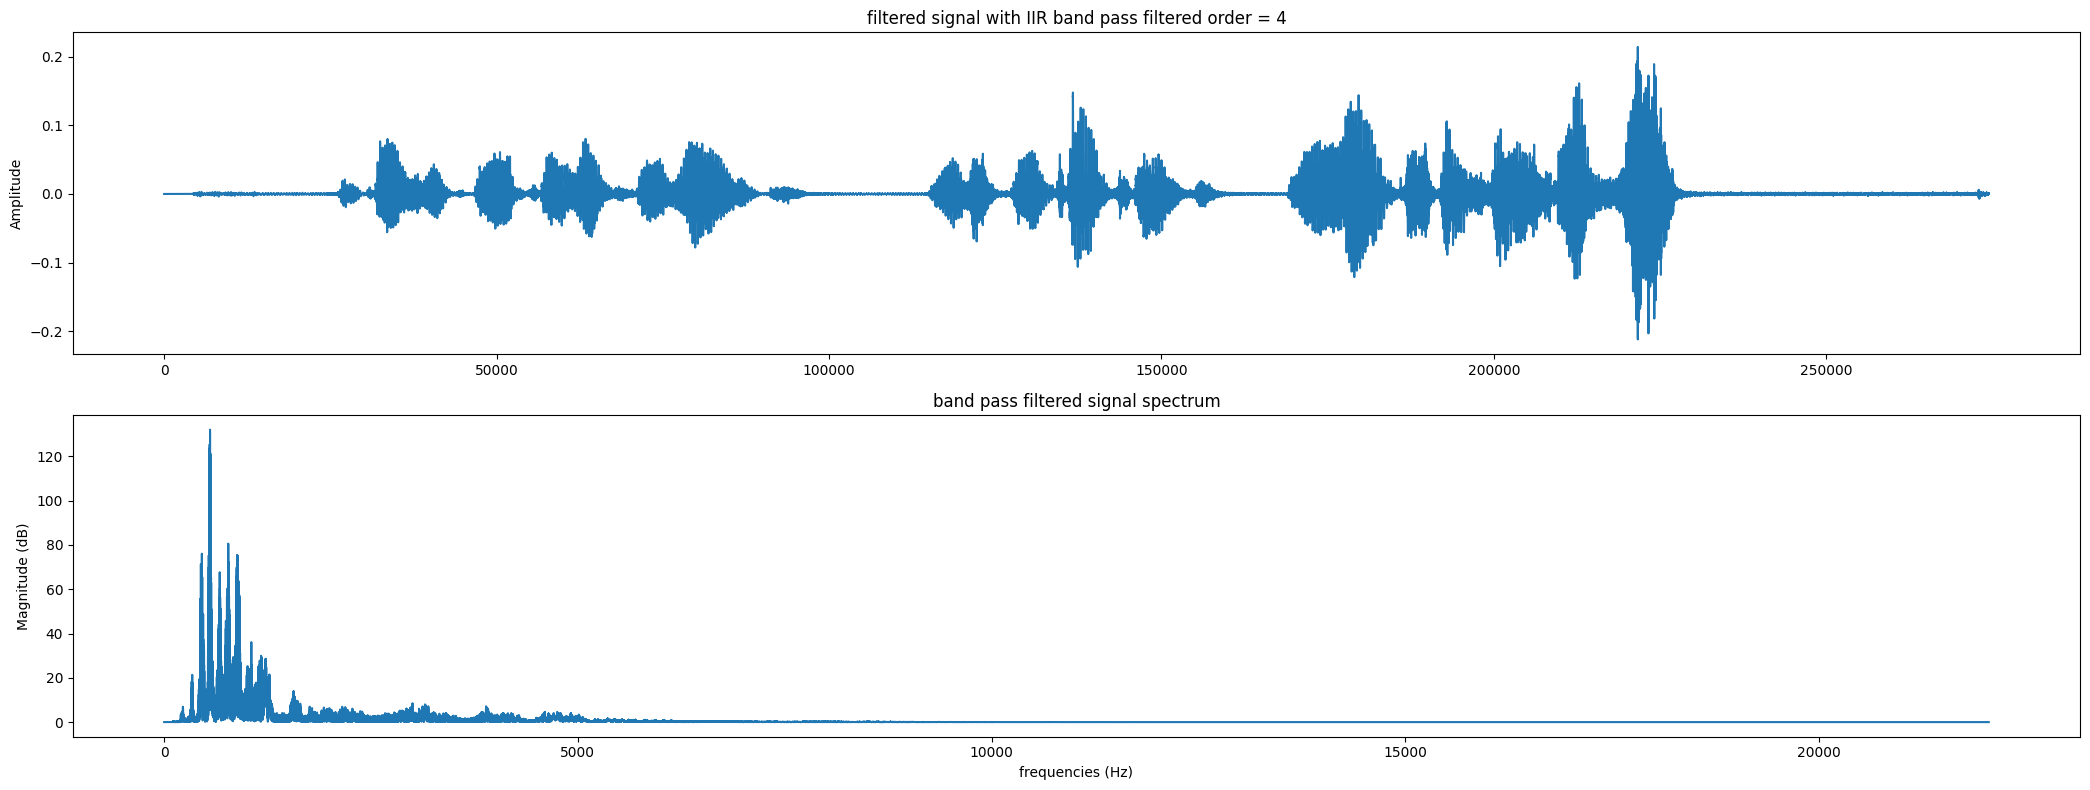



************************* displaying all type of filter results for order = 6 *******************************************


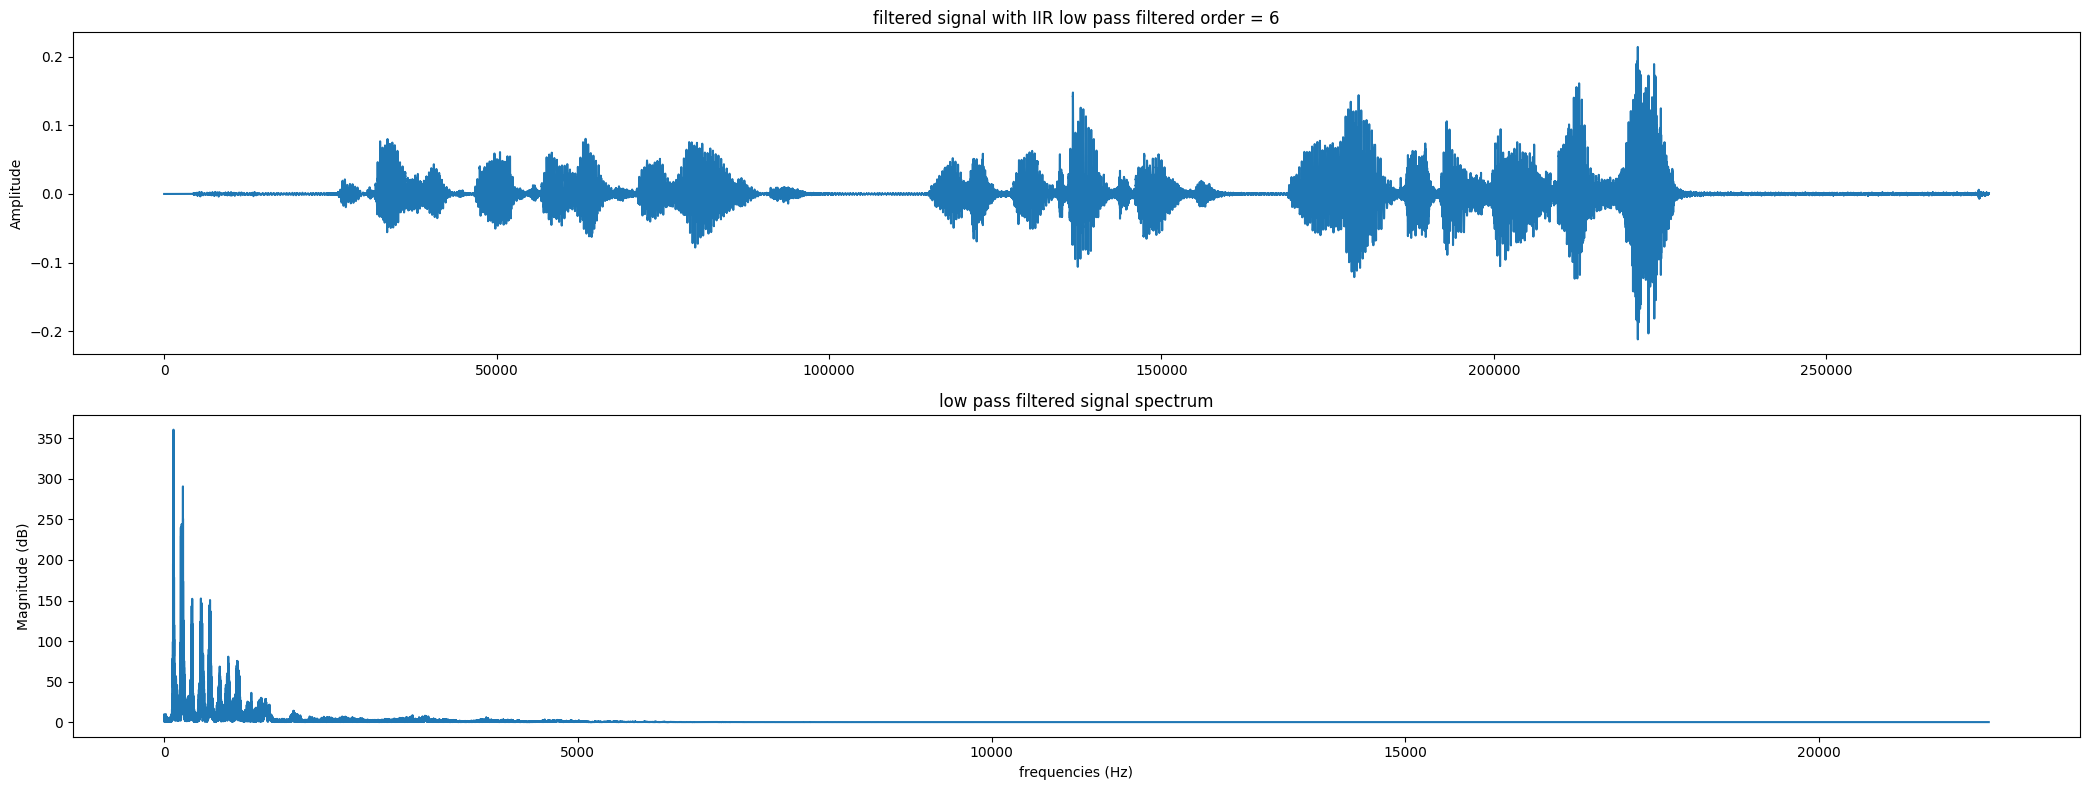

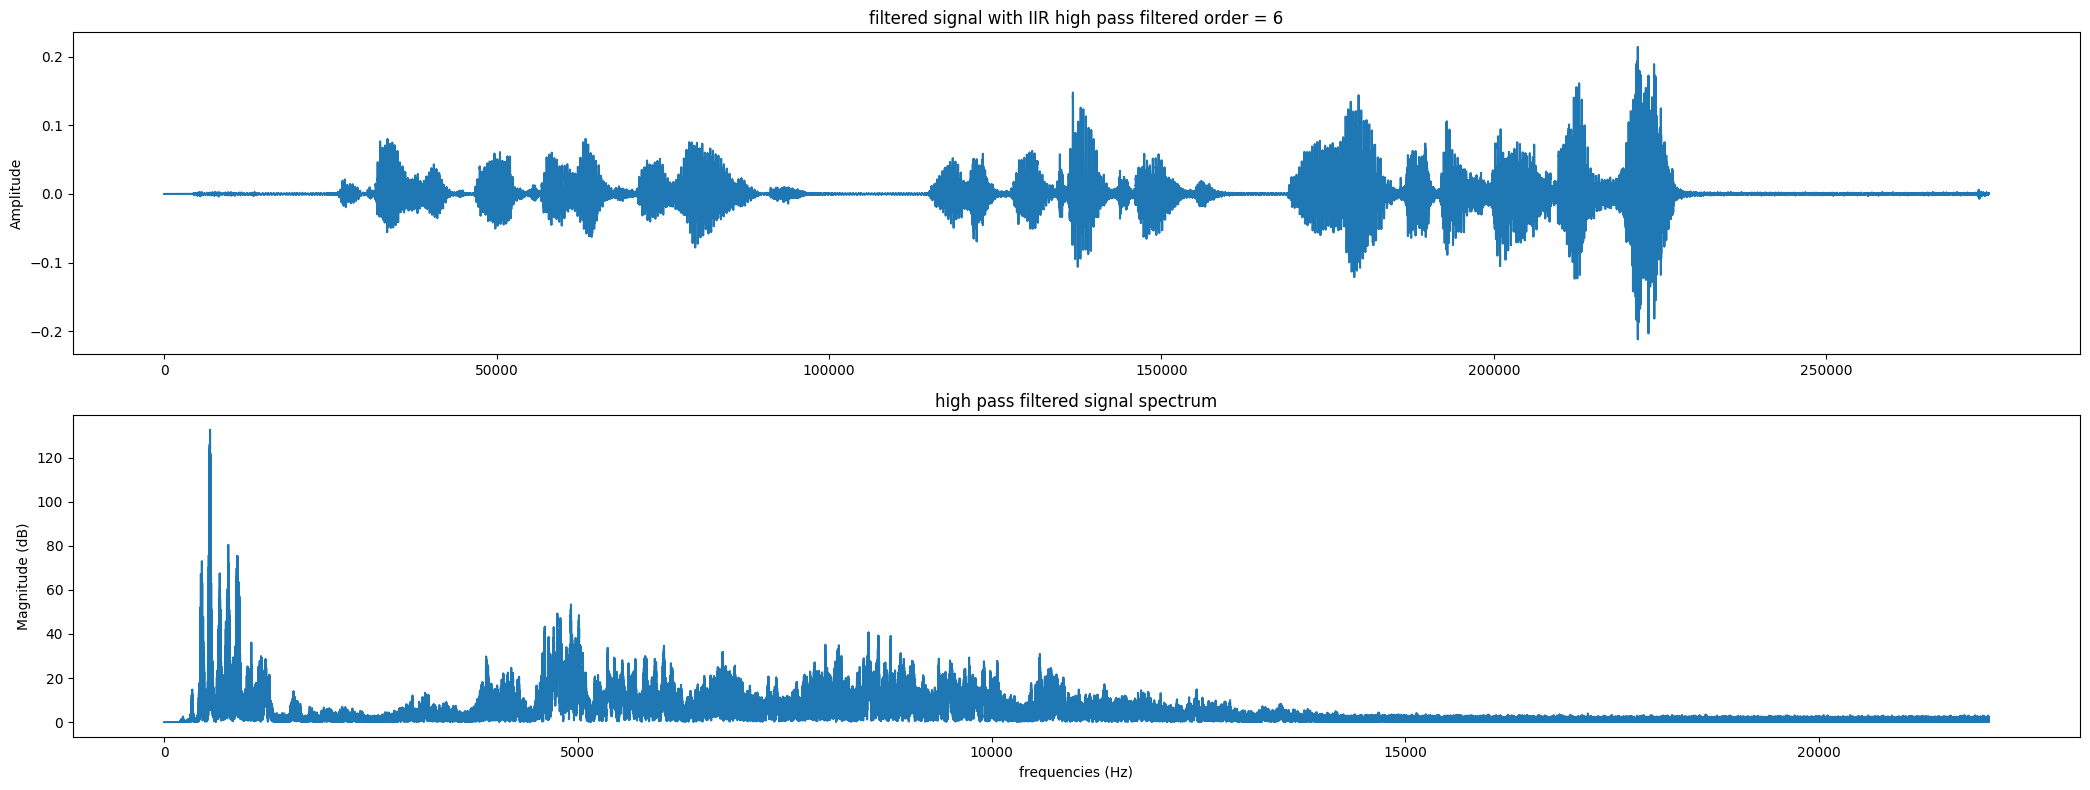

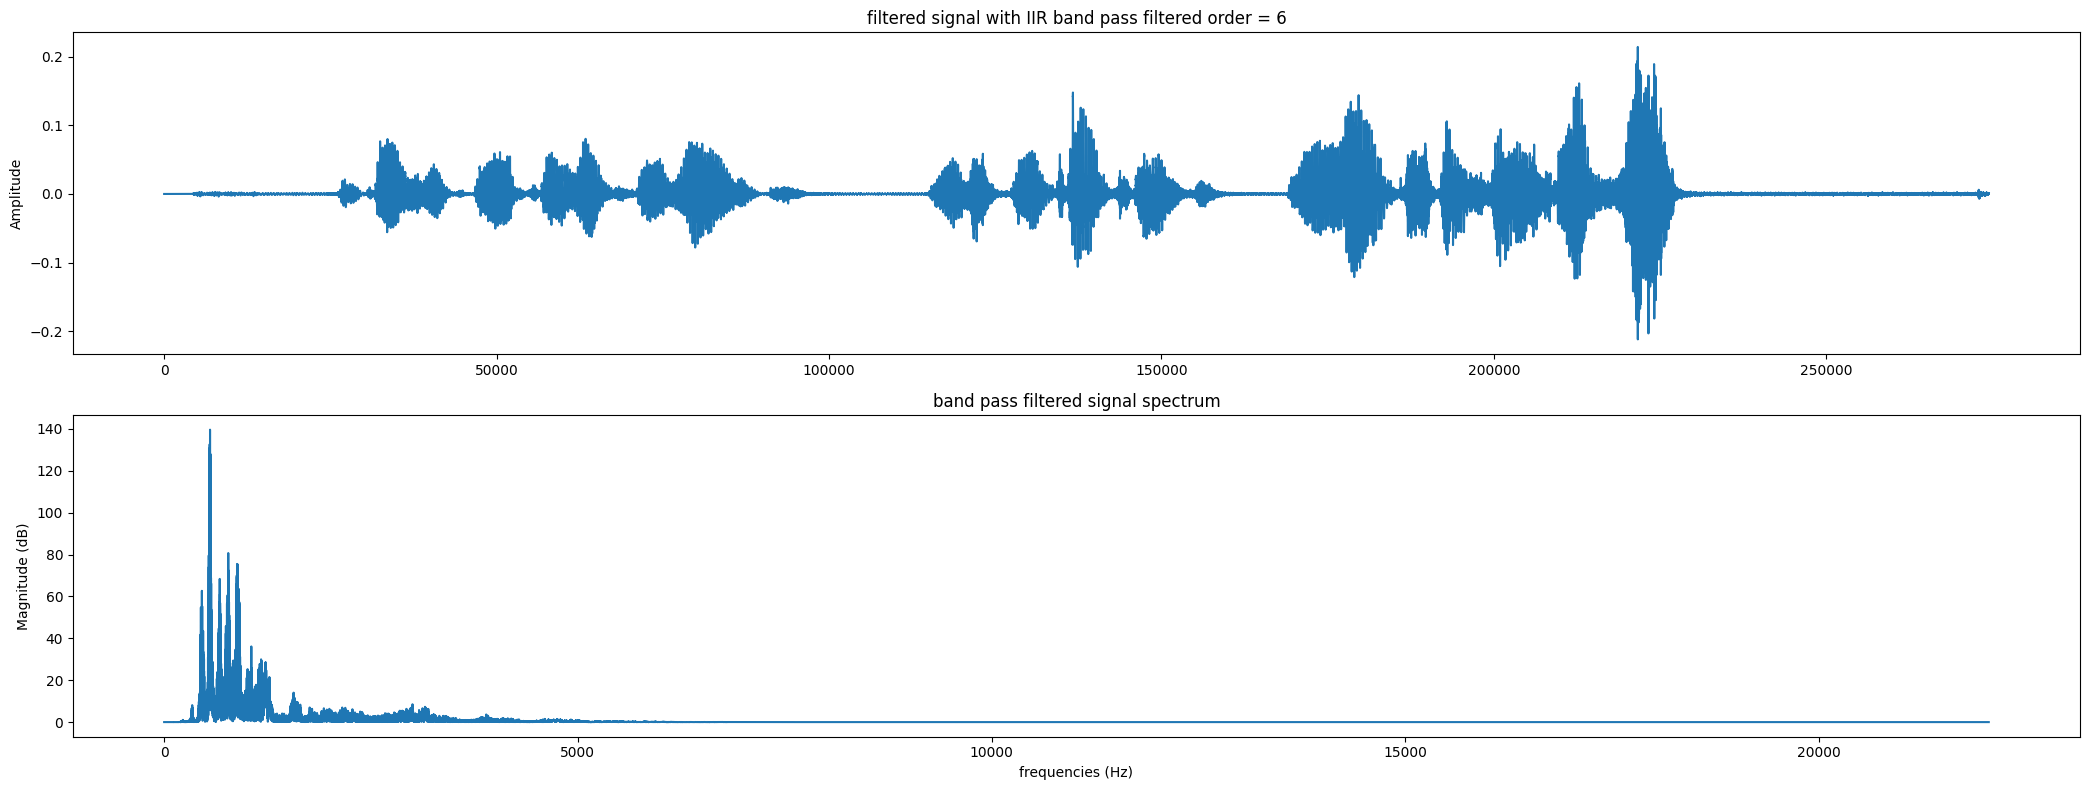

In [43]:
for j in range(len(orders)): 

    print(f'************************* displaying all type of filter results for order = {orders[j]} *******************************************')
    low_pass = low_pass_coeffs[j]
    high_pass_coeff = high_pass_coeffs[j]
    band_pass_coeff = band_pass_coeffs[j]

    filters_coeffs = [low_pass, high_pass_coeff, band_pass_coeff]

    for i in range(3): 

        
        # Applying the IIR filter to the signal
        filtered_noisy_signal = lfilter(*filters_coeffs[i], noisy_signal)
        if i == 0: 
            _type ='low pass'

        if i ==1: 
            _type = 'high pass'

        if i ==2: 
            _type = 'band pass'


        # displaying the fitered signal spectrum and compare it to the original signal spectrum
        fft_filtered_signal = np.fft.fft(filtered_noisy_signal)
        fft_filtered_freq = np.fft.fftfreq(len(filtered_noisy_signal), 1/fs)
        fig, axs = plt.subplots(2, 1, figsize=(21, 8))

        axs[0].plot(filtered_signal)
        axs[0].set_title(f'filtered signal with IIR {_type} filtered order = {orders[j]}')
        axs[0].set_ylabel('Amplitude')

        

        axs[1].plot(fft_filtered_freq[:len(fft_filtered_freq)//2], np.abs(fft_filtered_signal)[:len(fft_filtered_signal)//2])
        axs[1].set_title(f'{_type} filtered signal spectrum')
        axs[1].set_xlabel('frequencies (Hz)')
        axs[1].set_ylabel('Magnitude (dB)')


        plt.tight_layout()
        plt.show()

        print('\n')

# merged image to be able to make a comparison 
# Left is FIR, and right is IIR
![Image Description](./report5_images/noisy_sig/iir_fir_merges.png)